# 初始设置

D:\AnacONDa\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


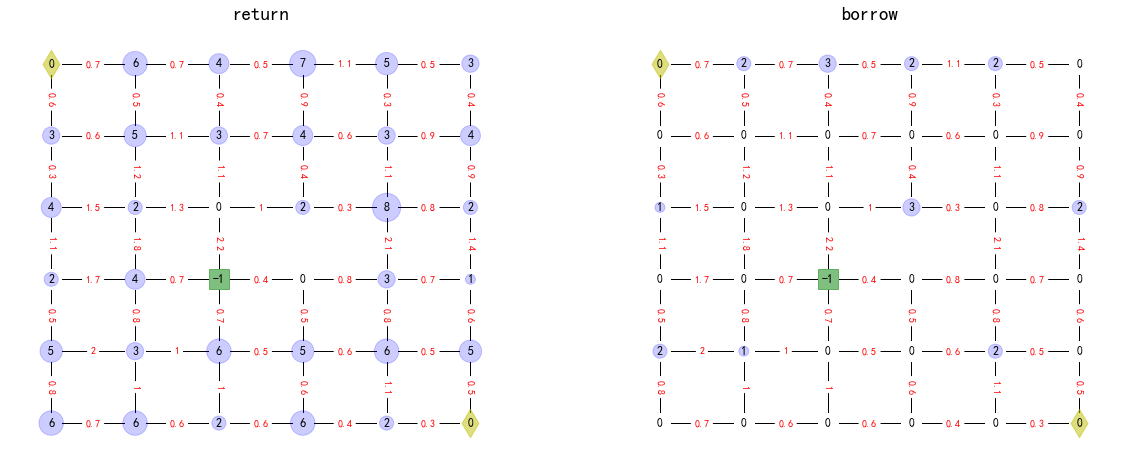

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
import pandas
import imageio
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号

# 格点数据
grid_data_return = [
    [0, 6, 4, 7, 5, 3],
    [3, 5, 3, 4, 3, 4],
    [4, 2, 0, 2, 8, 2],
    [2, 4, -1, 0, 3, 1],
    [5, 3, 6, 5, 6, 5],
    [6, 6, 2, 6, 2, 0]
]

grid_data_borrow = [
    [0, 2, 3, 2, 2, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 3, 0, 2],
    [0, 0, -1, 0, 0, 0],
    [2, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0]
]

# 路径数据
path_data = [
    [0.7, 0.7, 0.5, 1.1, 0.5],
    [0.6, 0.5, 0.4, 0.9, 0.3, 0.4],
    [0.6, 1.1, 0.7, 0.6, 0.9],
    [0.3, 1.2, 1.1, 0.4, 1.1, 0.9],
    [1.5, 1.3, 1, 0.3, 0.8],
    [1.1, 1.8, 2.2, float('inf'), 2.1, 1.4],
    [1.7, 0.7, 0.4, 0.8, 0.7],
    [0.5, 0.8, 0.7, 0.5, 0.8, 0.6],
    [2, 1, 0.5, 0.6, 0.5],
    [0.8, 1, 1, 0.6, 1.1, 0.5],
    [0.7, 0.6, 0.6, 0.4, 0.3]
]

# 创建一个新的无向图对象
G = nx.Graph()

# 添加格点数据
for i in range(len(grid_data_return)):
    for j in range(len(grid_data_return[i])):
        node = (i, j)
        G.add_node(node)
        G.nodes[node]['return'] = grid_data_return[i][j]
        G.nodes[node]['borrow'] = grid_data_borrow[i][j]

# 添加路径数据
for i in range(len(path_data)):
    if i % 2 == 0:  # 横向路径
        for j in range(len(path_data[i])):
            G.add_edge((i // 2, j), (i // 2, j + 1), weight=path_data[i][j])
    else:  # 纵向路径
        for j in range(len(path_data[i])):
            G.add_edge(((i-1) // 2,j), ((i+1)// 2, j), weight=path_data[i][j])
            
edge_attrs = nx.get_edge_attributes(G, 'weight') 

for w in edge_attrs:
    # 如果边权值为inf，则从图中移除该边
    if edge_attrs[w] == float('inf'):
        G.remove_edge(*w)
            
# 设置图形大小
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

#以固定位置绘制格点
pos = {}
for i in range(len(grid_data_return)):
    for j in range(len(grid_data_return[i])):
        pos[(i, j)] = (j, len(grid_data_return)-i-1)

#绘制无向图
nx.draw(G, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

#绘制节点值
node_labels = nx.get_node_attributes(G, 'return')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

#绘制边权值
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

# 创建一个节点大小字典
node_sizes = [node[1]['return']*100 for node in G.nodes(data=True)]

# 以固定位置绘制圆形
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='b', alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[(0,0),(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)

#显示图形
plt.title("return", size=19)
plt.axis('off')


plt.subplot(1,2,2)

#绘制无向图
nx.draw(G, pos, with_labels=False, node_size=400, node_color='w', font_size=10, font_weight='bold')

#绘制节点值
node_labels = nx.get_node_attributes(G, 'borrow')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold', font_color="black")

#绘制边权值
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

# 创建一个节点大小字典
node_sizes = [node[1]['borrow']*100 for node in G.nodes(data=True)]

# 以固定位置绘制圆形
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='b', alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[(0,0),(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)

#显示图形
plt.title("borrow", size=19)
plt.axis('off')
plt.show()



# 到达图书馆最短路径

In [27]:
# 计算每个格点到格点值为-1的点的最短路径长度

shortest_lengths = nx.shortest_path_length(G, target=(3,2), weight='weight')
shortest_paths=nx.shortest_path(G, target=(3,2), weight='weight')
shortest_lengths = {node: round(length, 2) for node, length in shortest_lengths.items()}
# nx.set_node_attributes(G, shortest_lengths, 'shortest_path_length')
for node in G.nodes:
    G.nodes[node]['shortest_path_length'] = shortest_lengths[node]

# 输出每个格点到格点值为-1的点的最短路径长度
for node in G.nodes:
    if node in shortest_lengths:
        print(f"({node}): {np.round(shortest_lengths[node],2)}——{shortest_paths[node]}")


((0, 0)): 4.4——[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)]
((0, 1)): 4.2——[(0, 1), (1, 1), (2, 1), (3, 1), (3, 2)]
((0, 2)): 3.7——[(0, 2), (1, 2), (2, 2), (3, 2)]
((0, 3)): 4.2——[(0, 3), (0, 2), (1, 2), (2, 2), (3, 2)]
((0, 4)): 4.5——[(0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2)]
((0, 5)): 4.6——[(0, 5), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3), (3, 2)]
((1, 0)): 3.8——[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2)]
((1, 1)): 3.7——[(1, 1), (2, 1), (3, 1), (3, 2)]
((1, 2)): 3.3——[(1, 2), (2, 2), (3, 2)]
((1, 3)): 3.6——[(1, 3), (2, 3), (2, 2), (3, 2)]
((1, 4)): 4.2——[(1, 4), (1, 3), (2, 3), (2, 2), (3, 2)]
((1, 5)): 4.2——[(1, 5), (2, 5), (3, 5), (3, 4), (3, 3), (3, 2)]
((2, 0)): 3.5——[(2, 0), (3, 0), (3, 1), (3, 2)]
((2, 1)): 2.5——[(2, 1), (3, 1), (3, 2)]
((2, 2)): 2.2——[(2, 2), (3, 2)]
((2, 3)): 3.2——[(2, 3), (2, 2), (3, 2)]
((2, 4)): 3.3——[(2, 4), (3, 4), (3, 3), (3, 2)]
((2, 5)): 3.3——[(2, 5), (3, 5), (3, 4), (3, 3), (3, 2)]
((3, 0)): 2.4——[(3, 0), (3, 1), (3, 2)]
((3, 1)): 0.7——[(3, 1), 

# 真实坐标

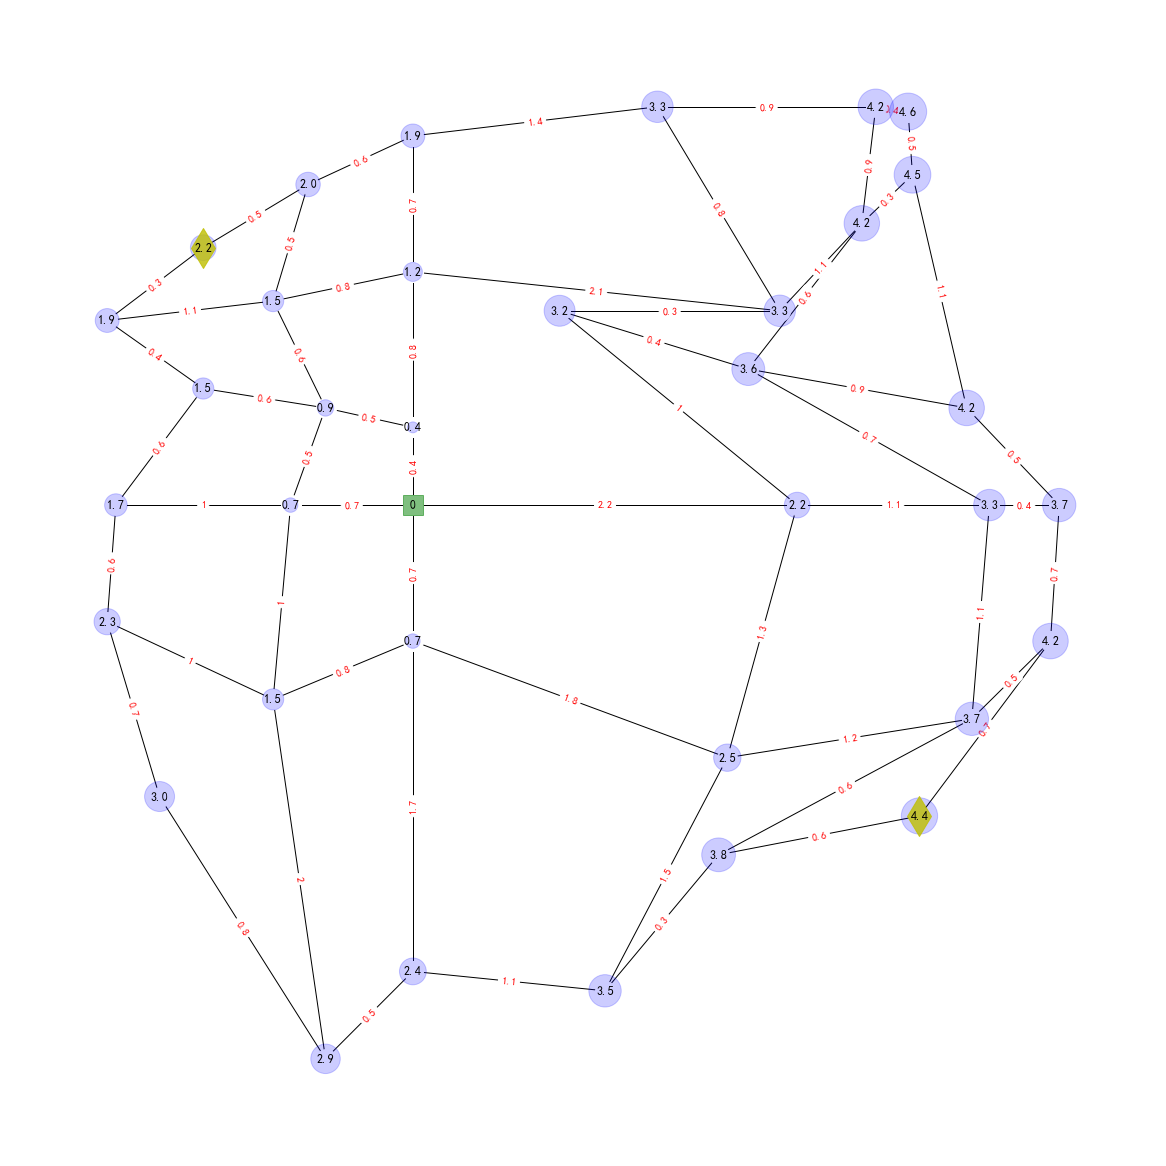

In [28]:
plt.figure(figsize=(16, 16))


#以固定位置绘制格点
pos = {}
# for i in range(len(grid_data)):
#     for j in range(len(grid_data[i])):
#         pos[(i, j)] = (j, len(grid_data)-i-1)

# 去除inf值
filtered_values = [value for value in edge_attrs.values() if value != float('inf')]

# 计算平均值
mean = np.mean(filtered_values)
# print(mean)

pos[(3,2)]=(0,0)
source=[3,2]

def LEN(r1,r2,mean):
    #返回正确的边值
    if r1[0]==r2[0] and r1[1]==r2[1]:
        Re=0
    elif r1[0]<=r2[0] and r1[1]<=r2[1]:
        if np.abs((r1[0]-r2[0])+(r1[1]-r2[1]))>1:
            print("ERROR")
        if ((r1[0],r1[1]), (r2[0],r2[1])) not in edge_labels:
             Re=np.round(mean,2)
        else:
            Re=edge_labels[(r1[0],r1[1]), (r2[0],r2[1])]
    else:
        Re=LEN(r2, r1, mean)
    return Re

def order_edge(edge):
    return tuple(sorted(edge))

def Lab(i,j,source):
    #返回正确的方向
    I=source[0]
    J=source[1]
    I_=J_=0
    if i>source[0]:
        I=i-1
        I_=-1
    elif i<source[0]:
        I=i+1
        I_=1
    if j>source[1]:
        J=j-1
        J_=1
    elif j<source[1]:
        J=j+1
        J_=-1
    return I,J,I_,J_
        
def real_length(label,source,mean):
    i=label[0]
    j=label[1]
    r1=[i,j]
    if i!=source[0] or j!=source[1]:
        I,J,I_,J_=Lab(i,j,source)
        
#         X=real_length([I,j],[source[0],j],mean)[0]+LEN(label,[I,j],mean)*I_
#         Y=real_length([i,J],[i,source[1]],mean)[1]+LEN(label,[i,J],mean)*J_
        
#         X=real_length([I,J],source,mean)[0]+LEN(label,[I,j],mean)*I_
#         Y=real_length([I,J],source,mean)[1]+LEN(label,[i,J],mean)*J_
        
        IJ_length = real_length([I, J], source, mean)
        Ij_length = real_length([I, j], [source[0], j], mean)
        ij_length = real_length([i, J], [i, source[1]], mean)

        X = (IJ_length[0] + Ij_length[0]) / 2 + LEN(label, [I, j], mean) * I_
        Y = (IJ_length[1] + ij_length[1]) / 2 + LEN(label, [i, J], mean) * J_

    else :
        X=0
        Y=0
    return X,Y

for i in range(len(grid_data_borrow)):
    for j in range(len(grid_data_borrow[i])):
        X,Y=real_length([i,j],[3,2],mean)
        pos[(i, j)] = (X,Y)

#绘制无向图
nx.draw(G, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

#绘制节点值
node_labels = nx.get_node_attributes(G, 'shortest_path_length')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

#绘制边权值
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

# 创建一个节点大小字典
node_sizes = [node[1]['shortest_path_length']*300 for node in G.nodes(data=True)]

# 以固定位置绘制圆形
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='b', alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[(0,0),(5,5)], node_shape='d', node_size=800, node_color='y', alpha=0.8)

#显示图形
plt.axis('off')
plt.show()


In [29]:
name_node={
    (0, 0):"充电桩A",
    (1, 0): "四美楼",
    (1, 3): "耸翠楼",
    (2, 0): "芳邻楼",
    (2, 3): "朱华楼",
    (3, 0): "凌云楼",
    (3, 3): "分岔路",
    (4, 3): "绿竹楼",
    (4, 0): "远山楼",
    (5, 3): "沉璧楼",
    (5, 0): "重霄楼",
    (0, 4): "雅望楼",
    (0, 1): "北辰楼",
    (1, 4): "朝晖楼",
    (1, 1): "弥津楼",
    (2, 4): "流丹楼",
    (2, 1): "映雪楼",
    (3, 4): "俊采楼",
    (3, 1): "高洁楼",
    (4, 4): "汀兰楼",
    (4, 1): "南溟楼",
    (5, 4): "兰亭楼",
    (5, 1): "长洲楼",
    (0, 5): "郁青楼",
    (0, 2): "秋水楼",
    (1, 5): "星耀楼",
    (1, 2): "临川楼",
    (2, 5): "万千楼",
    (2, 2): "十字路口",
    (4, 2): "景明楼",
    (3, 2):"图书馆",
    (3, 5): "东隅楼",
    (5, 2): "清风楼",
    (4, 5): "长风楼",
    (0, 3): "皓月楼",
    (5, 5):"充电桩B"
}

# 机器人设定

In [30]:
# 机器人类
class Robot_plus:
    def __init__(self,G,capacity,current,speed,borrow,k):
        self.map_data = G # 机器人的地图信息
        self.capacity = capacity  # 机器人的容量
        self.book_return = 0  # 机器人当前携带的书籍 {还书}
        self.book_borrow = 0  # 机器人当前携带的书籍 {借书}
        self.initial_borrow = borrow
        self.current_location = current  # 机器人当前所在位置
        self.goal_location = (3,2)  # 机器人目标位置
        self.origin_location = current  # 机器人初始位置
        self.speed = speed  # 机器人行进速度
        self.time = 0 # 机器人运行时间
        self.length_time = 0 # 机器人运行时间
        self.indicator=0 #机器人状态指示，0：初始，1：寻路取书，2：返回图书馆，3：返回起始点
        self.k=k #机器人的抉择系数

    def find_valuable_path_to_load(self):
        # 价值最大化贪心算法尝试到达满载最短路径所需经过的第一个楼栋
        Return_books = nx.get_node_attributes(self.map_data, 'return')
        Borrow_books = nx.get_node_attributes(self.map_data, 'borrow')
        vacancy = self.capacity - self.book_borrow - self.book_return
        
        neighbors = [nb for nb in self.map_data.neighbors(self.current_location) 
                     if (Return_books[nb]> 0 and vacancy> 0) or (self.book_borrow>0) and(Borrow_books[nb]> 0) ]#邻表
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径长度
        Shortest_path_lengths = nx.get_node_attributes(self.map_data, 'shortest_path_length')#最短路
        
        # 邻表存在书目
        if neighbors:          
            # 选择相对价值更大的节点
#             sorted_buildings = sorted(neighbors, key=lambda x: np.power(min(Returning_books[x], vacancy)
#                                       / LEN(self.current_location, x, 0),self.k[0])-self.k[1]*Shortest_path_lengths[x])
            sorted_buildings = sorted(neighbors, key=lambda x: 
                                      min(Return_books[x], vacancy)/ LEN(self.current_location, x, 0)*self.k[0]
                                      +min(Borrow_books[x], self.book_borrow)/ LEN(self.current_location, x, 0)*self.k[1]
                                      -self.k[2]*Shortest_path_lengths[x]
                                     +np.sum([nb for nb in self.map_data.neighbors(x) if Return_books[nb] > 0]))
            
            building = sorted_buildings[-1]
            
            # 放置书目
            put_books = min(Borrow_books[building], self.book_borrow)
            self.book_borrow -= put_books
            self.map_data.nodes[building]['borrow'] -= put_books
            
            #拿取书目
            vacancy = self.capacity - self.book_borrow - self.book_return
            taken_books = min(Return_books[building], vacancy)
            self.book_return += taken_books
            self.map_data.nodes[building]['return'] -= taken_books
            
            # 记录所需时间
            self.length_time = Path_lengths[order_edge((building, self.current_location))]/self.speed

            return Path_lengths[order_edge((building, self.current_location))], building, [taken_books,put_books]
        
        else:
            #邻表无需求书目时
            nonzero_nodes_r = [node for node, value in self.map_data.nodes(data='return') if (value > 0) and node!=self.current_location]            
            nonzero_nodes_b = [node for node, value in self.map_data.nodes(data='borrow') if (value > 0) and node!=self.current_location] 
            nonzero_nodes = list(set(nonzero_nodes_r + nonzero_nodes_b))
            # 计算每个节点到当前位置的最短路径长度
            shortest_path_lengths = nx.shortest_path_length(self.map_data, target=self.current_location, weight='weight')
            # 选择相对价值更大的节点
#             target_node = max(nonzero_nodes, key=lambda x: np.power(min(Returning_books[x], vacancy)
#                                       / shortest_path_lengths[x],self.k[0])-self.k[1]*Shortest_path_lengths[x])

            target_node = max(nonzero_nodes, key=lambda x: 
                              min(Return_books[x], vacancy)/ shortest_path_lengths[x]*self.k[0]
                              +min(Borrow_books[x], self.book_borrow)/shortest_path_lengths[x]*self.k[1]
                              -self.k[2]*Shortest_path_lengths[x]
                             +np.sum([nb for nb in self.map_data.neighbors(x) if Return_books[nb] > 0]))
            #去该节点的路径
            shortest_paths=nx.shortest_path(self.map_data,target=target_node,weight='weight')
            node=shortest_paths[self.current_location][1]
            # 记录所需时间
            self.length_time = Path_lengths[order_edge((node, self.current_location))]/self.speed
            
            return Path_lengths[order_edge((node, self.current_location))], node, [0 ,0]

    def return_to_library(self):
        # 机器人返回图书馆
        shortest_paths=nx.shortest_path(self.map_data,target=(3,2),weight='weight')
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径
        shortest_path_length=nx.get_node_attributes(self.map_data, 'shortest_path_length')
        
        if self.current_location !=(3,2):
            node=shortest_paths[self.current_location][1]
            self.goal_location=node
            self.length_time = Path_lengths[order_edge((node, self.current_location))]/self.speed
            return Path_lengths[order_edge((node, self.current_location))],node
        else:
            self.goal_location=(3,2)
            self.length_time = 0
            return 0,(3,2)
        
    def return_to_origion(self):
        # 机器人返回初始地
        shortest_paths_lengths = nx.shortest_path_length(self.map_data, source=self.current_location, target=self.origin_location, weight='weight')
        shortest_paths = nx.shortest_path(self.map_data, source=self.current_location, target=self.origin_location, weight='weight')
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径
        if self.current_location != self.origin_location:
            node=shortest_paths[1]
            self.goal_location=node
            self.length_time = Path_lengths[order_edge((node, self.current_location))]/self.speed
            return Path_lengths[order_edge((node, self.current_location))],node
        else:
            self.length_time=0
            return 0,self.origin_location

# 主程序

开始运行


C:\Users\husky\AppData\Local\Temp\ipykernel_23880\3438093682.py:142: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_row = np.array([t, A.current_location, A.goal_location,A.book_return,A.book_borrow, B.current_location, B.goal_location,B.book_return,B.book_borrow])
C:\Users\husky\AppData\Local\Temp\ipykernel_23880\3438093682.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 8))


该车已经返回充电桩
该车已经返回充电桩
Total time: 5.9625


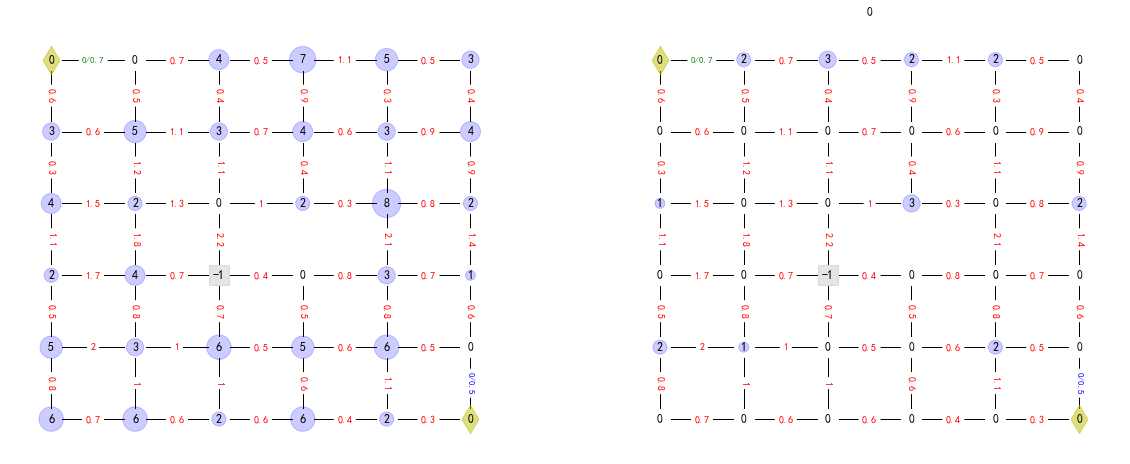

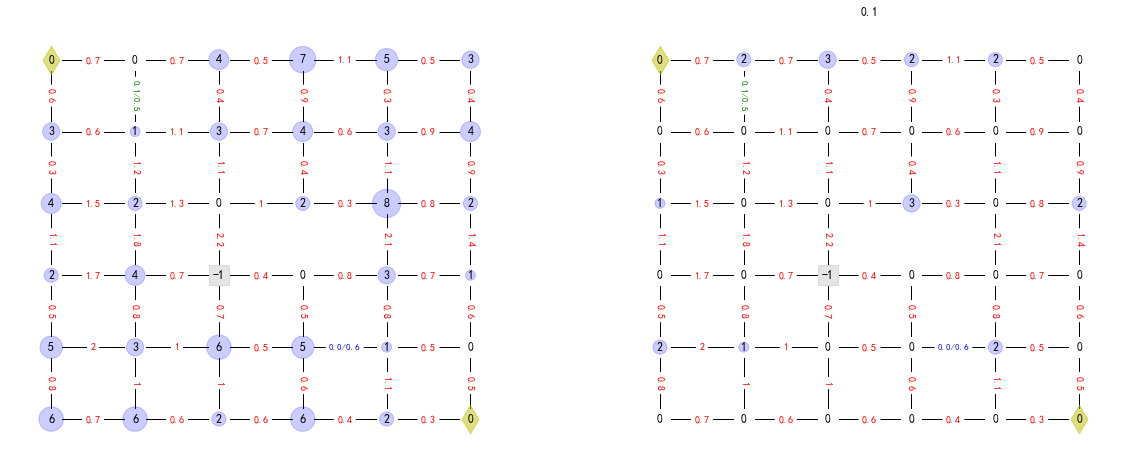

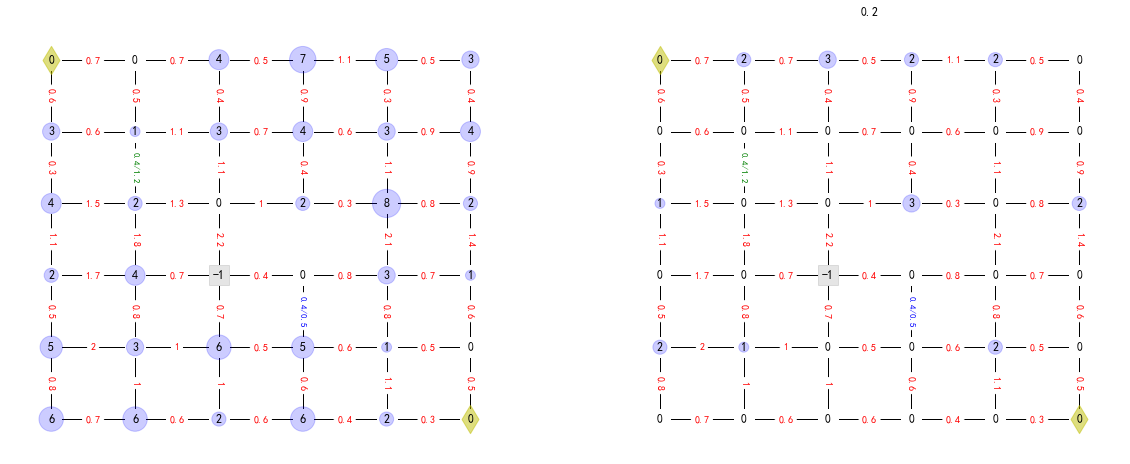

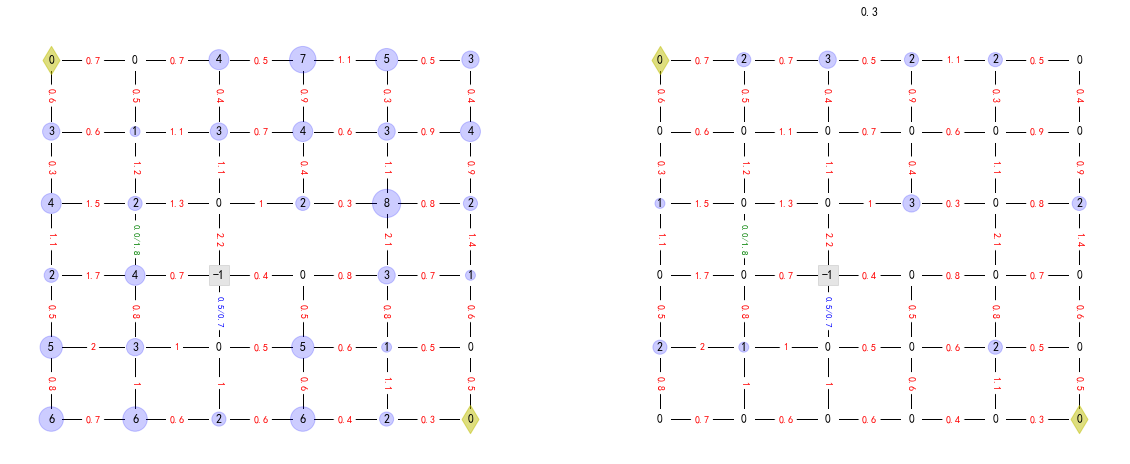

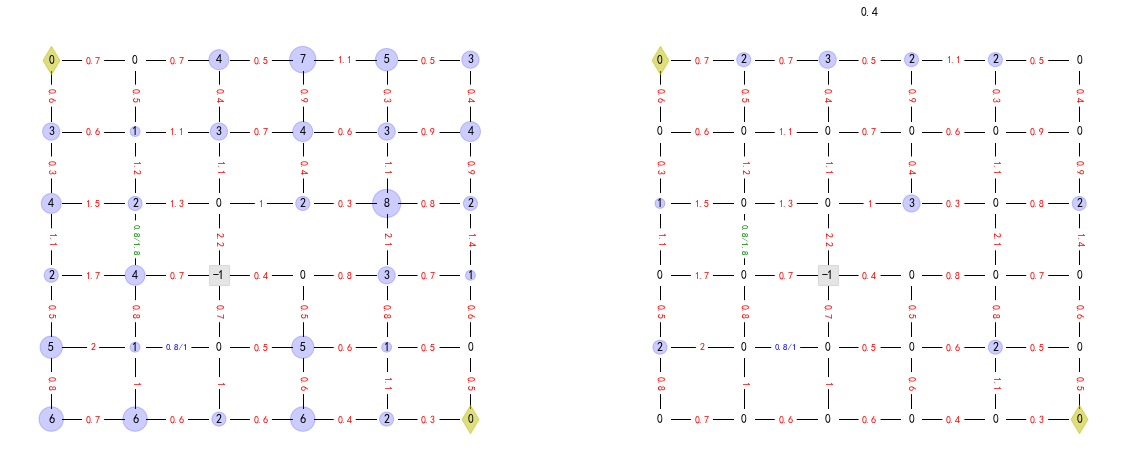

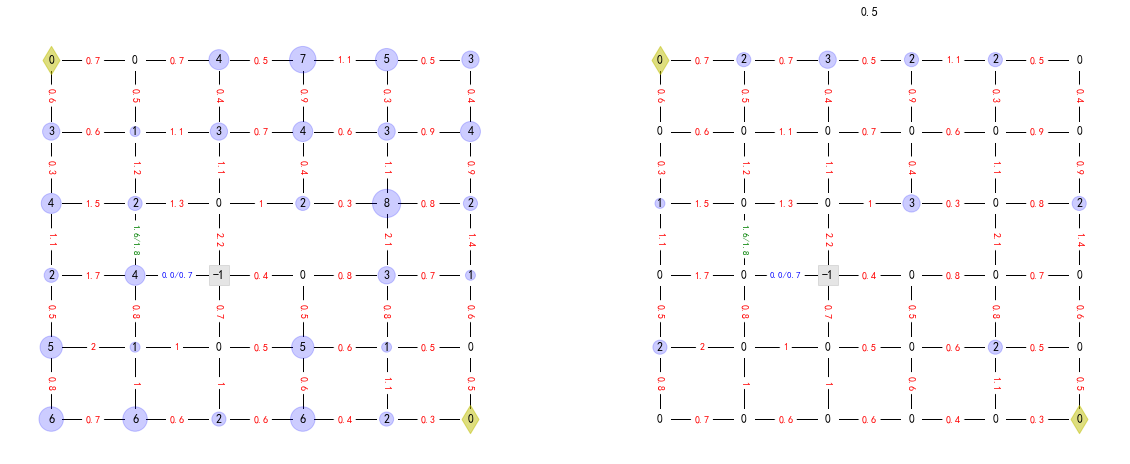

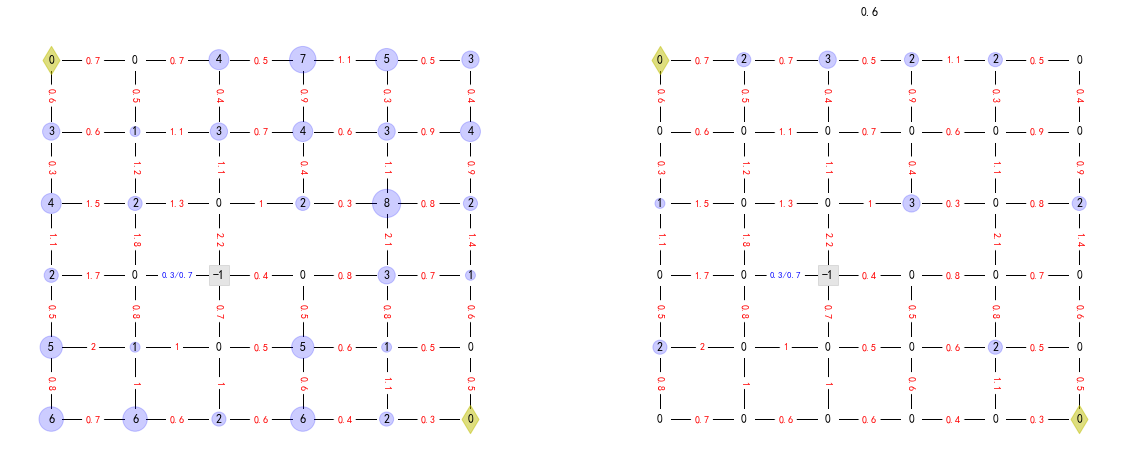

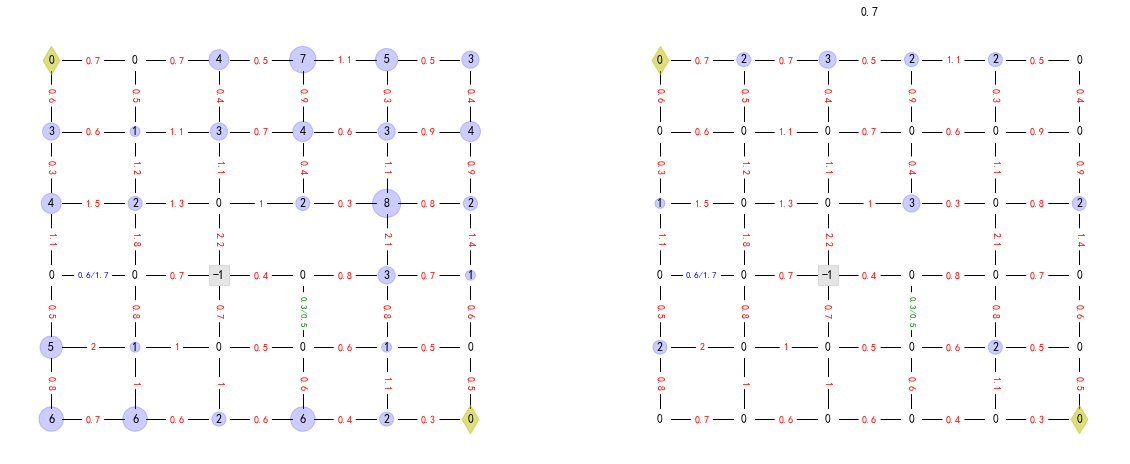

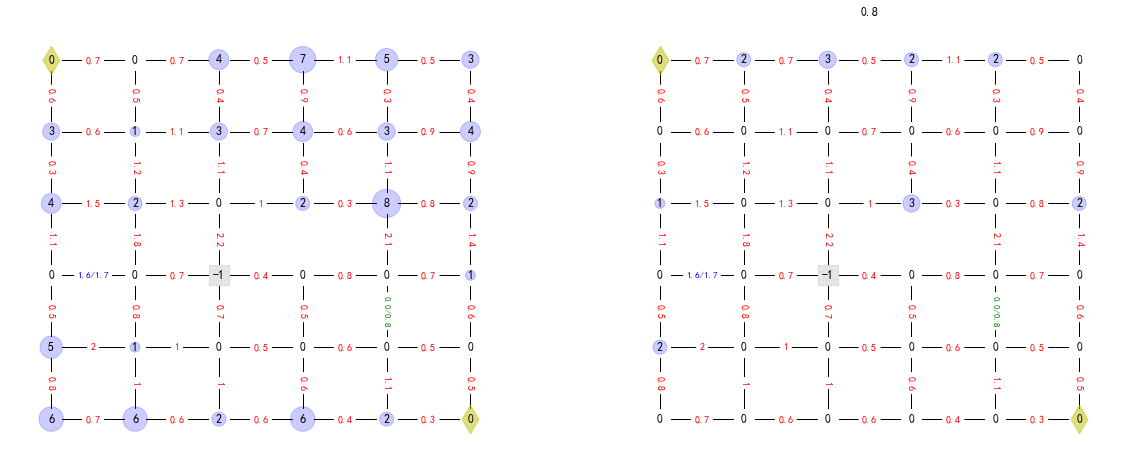

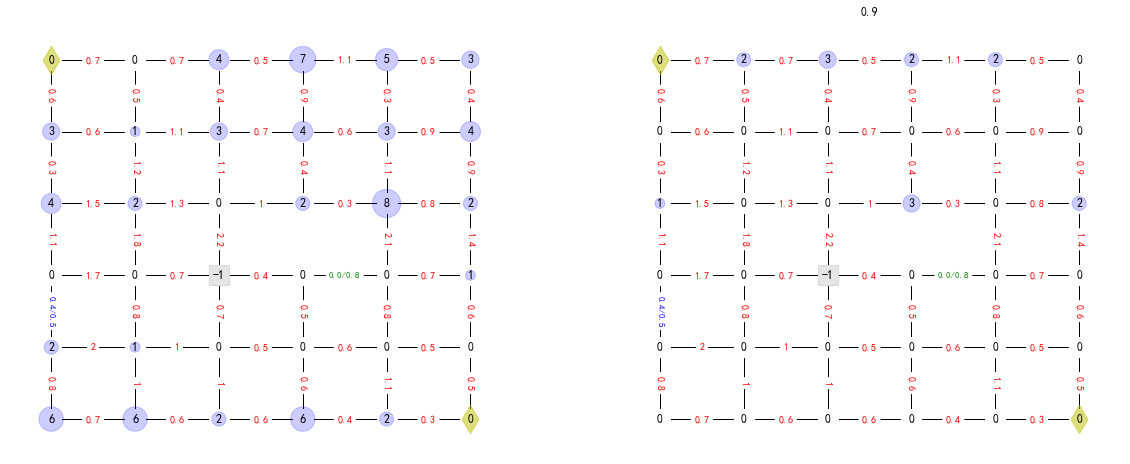

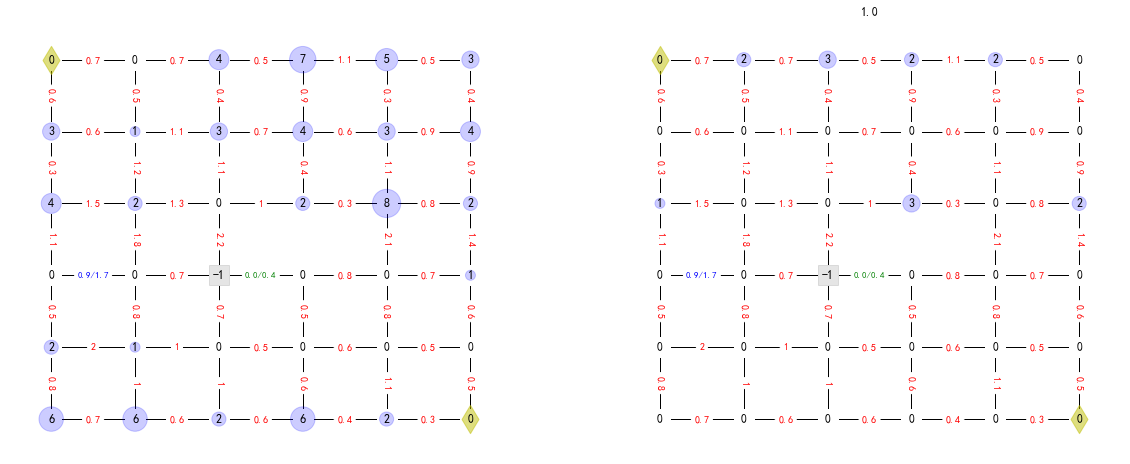

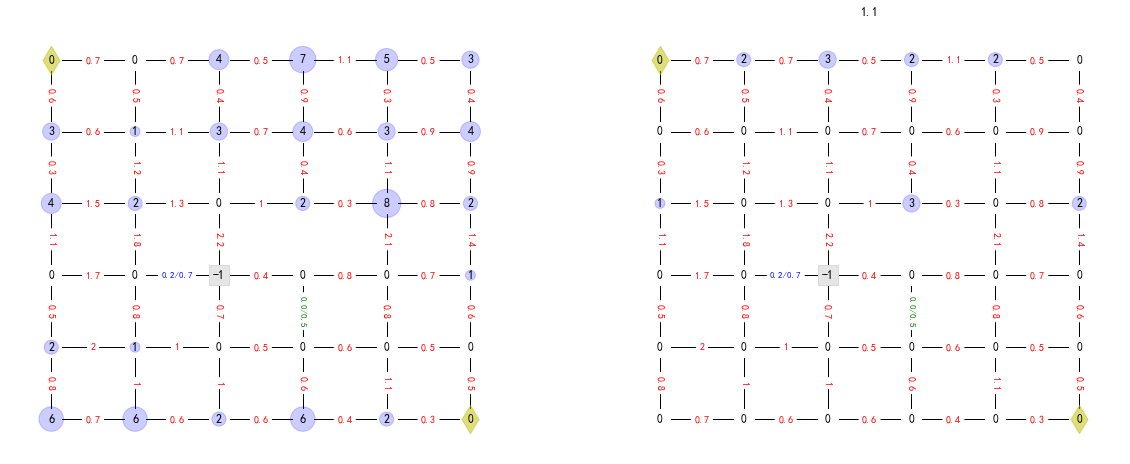

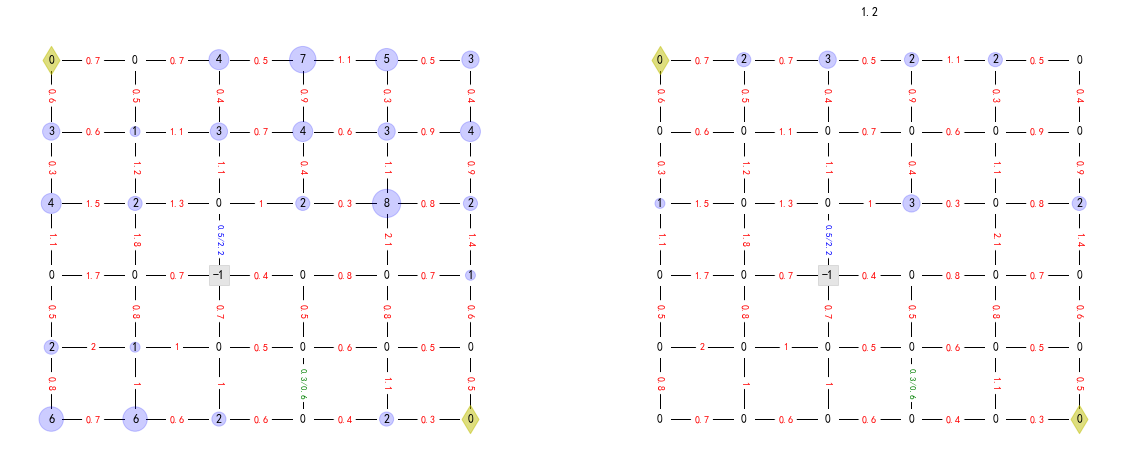

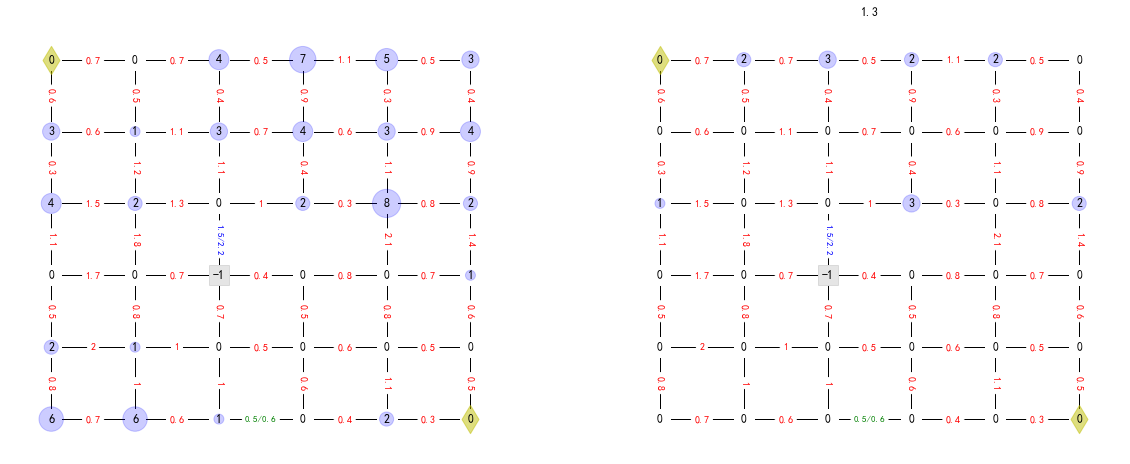

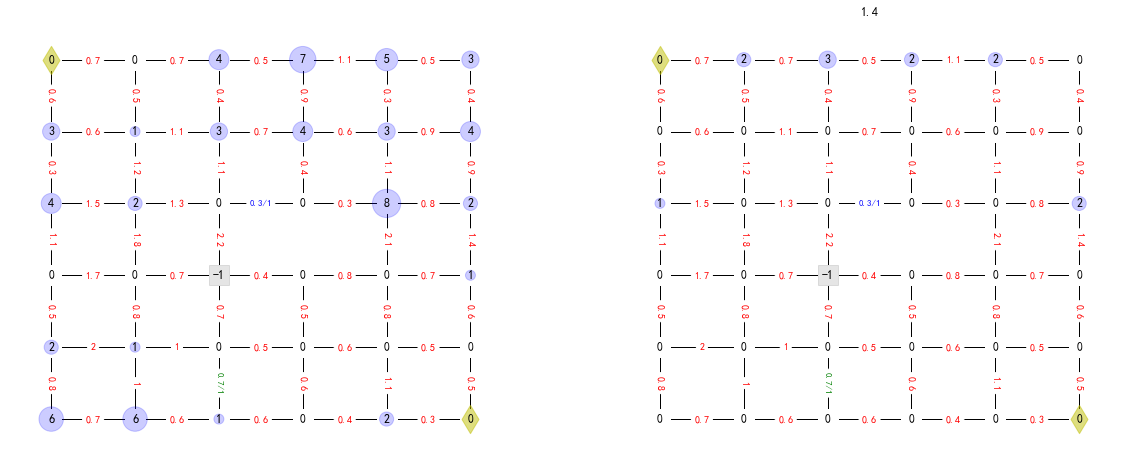

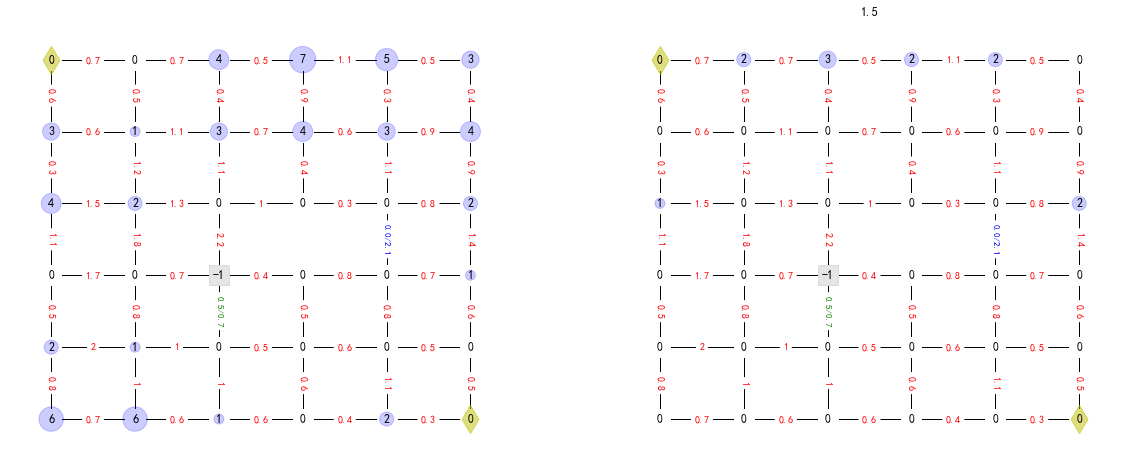

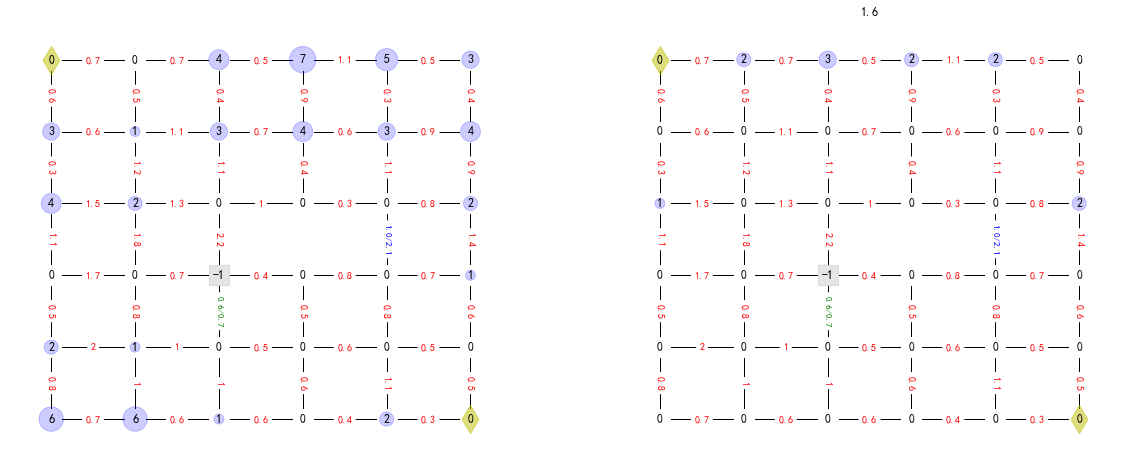

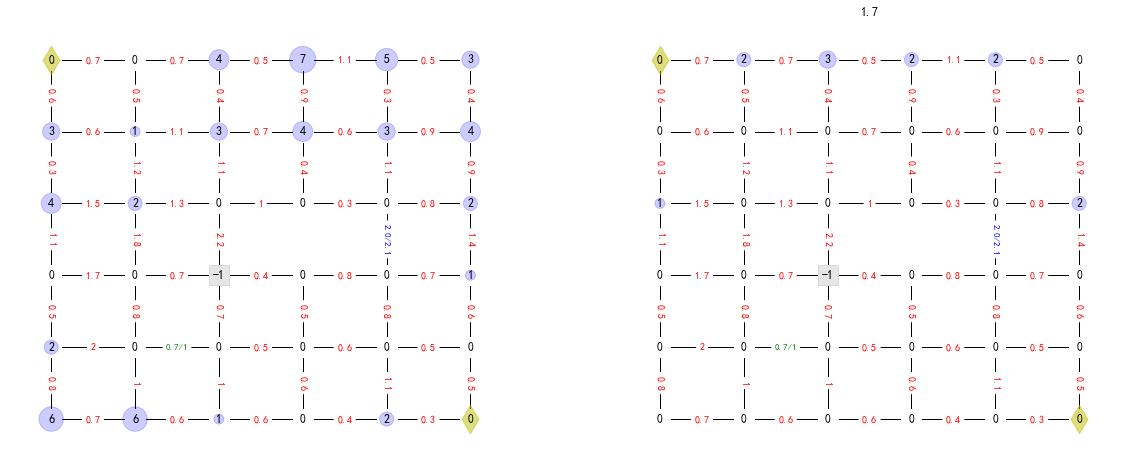

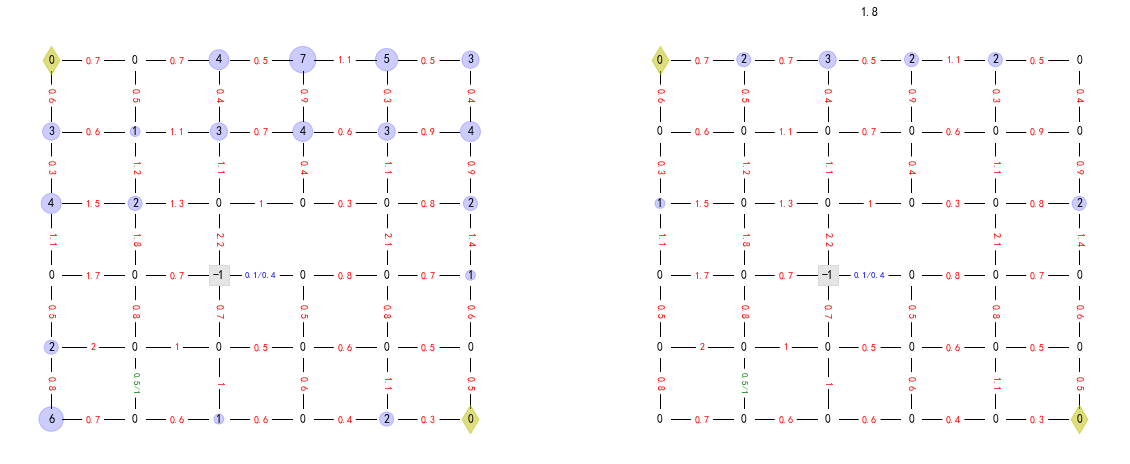

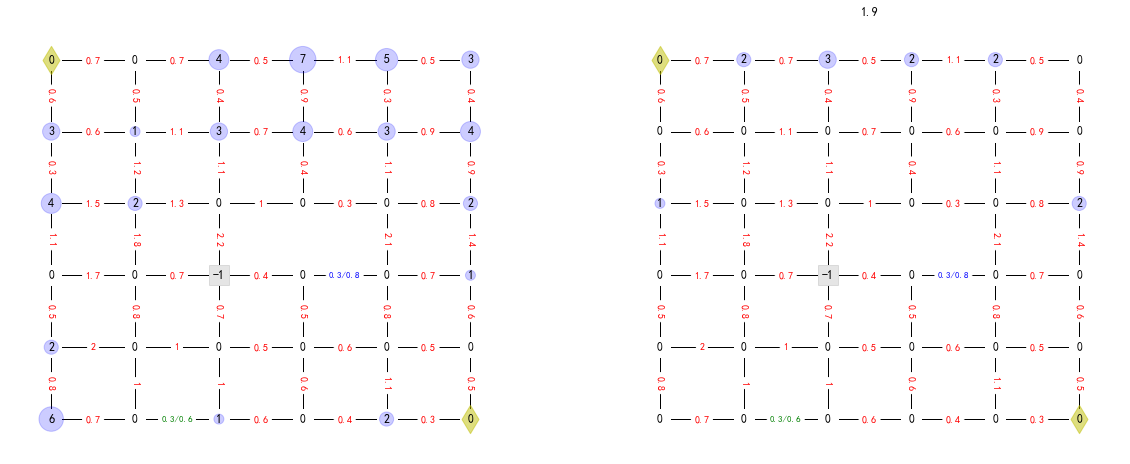

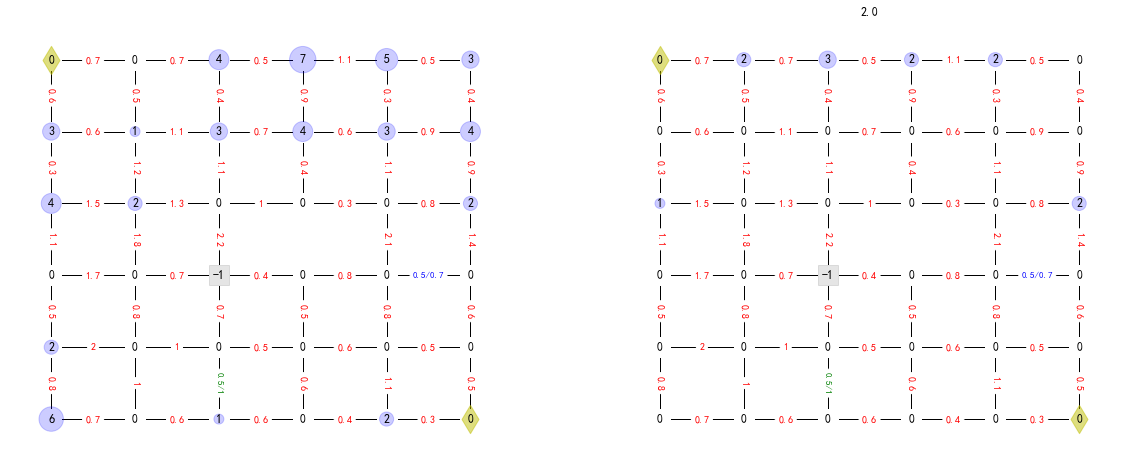

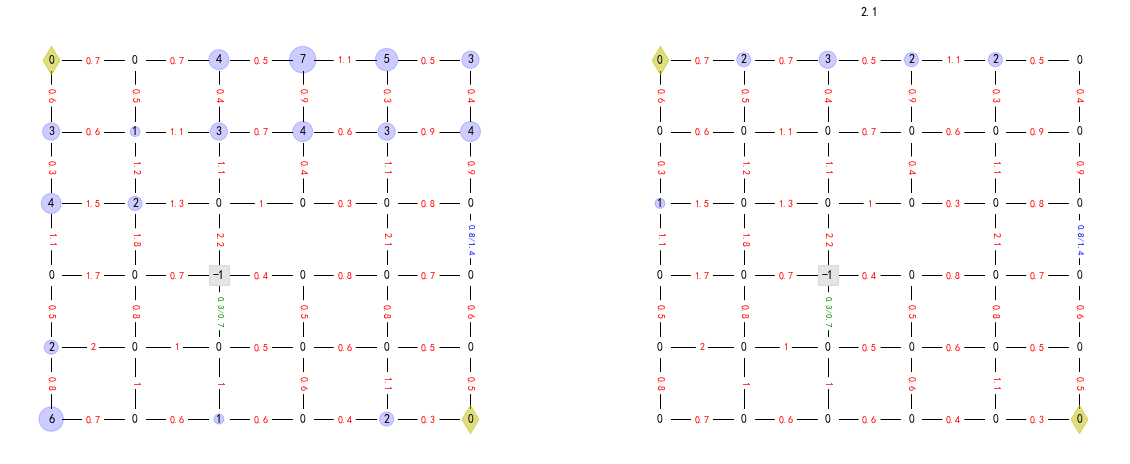

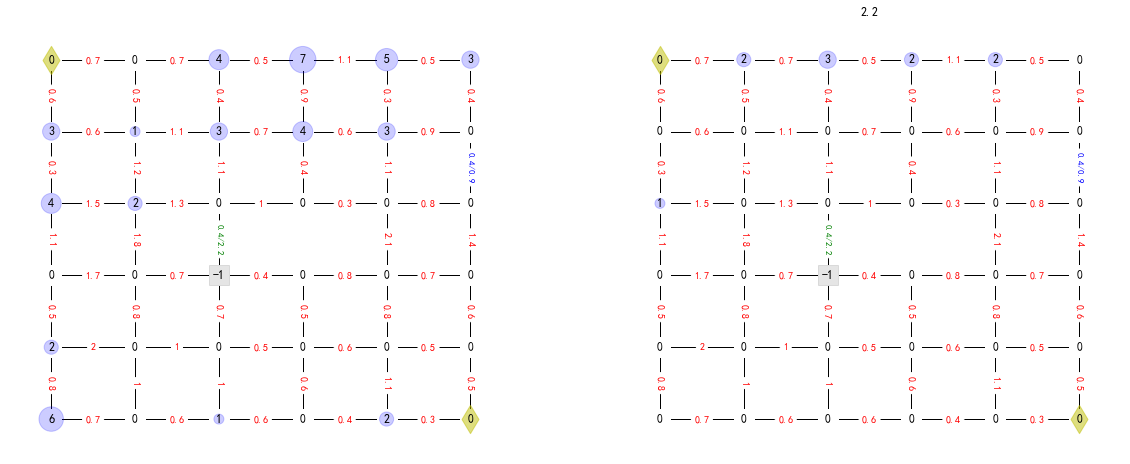

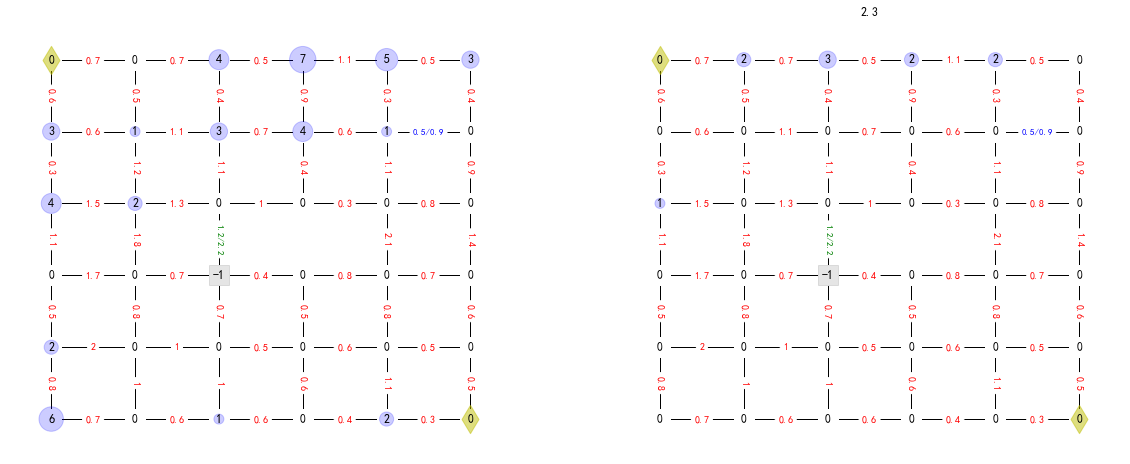

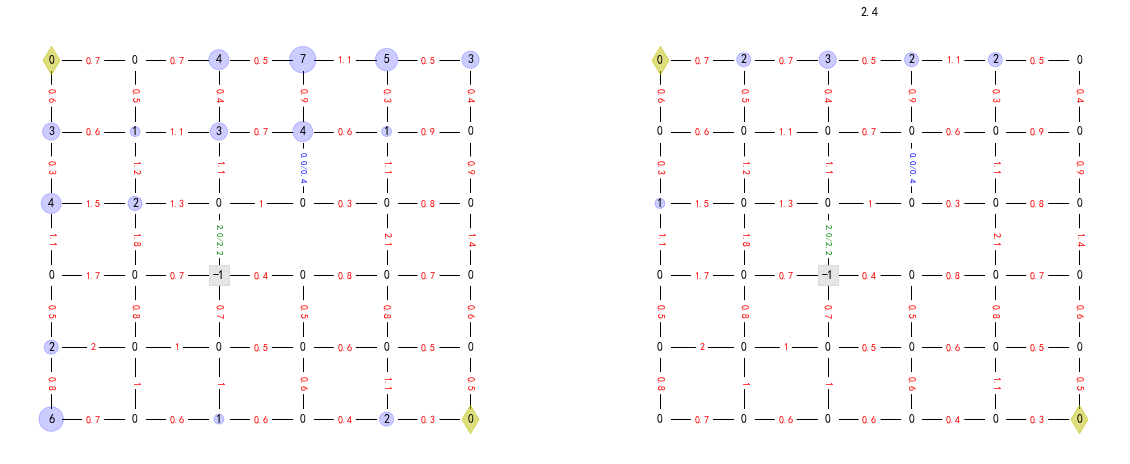

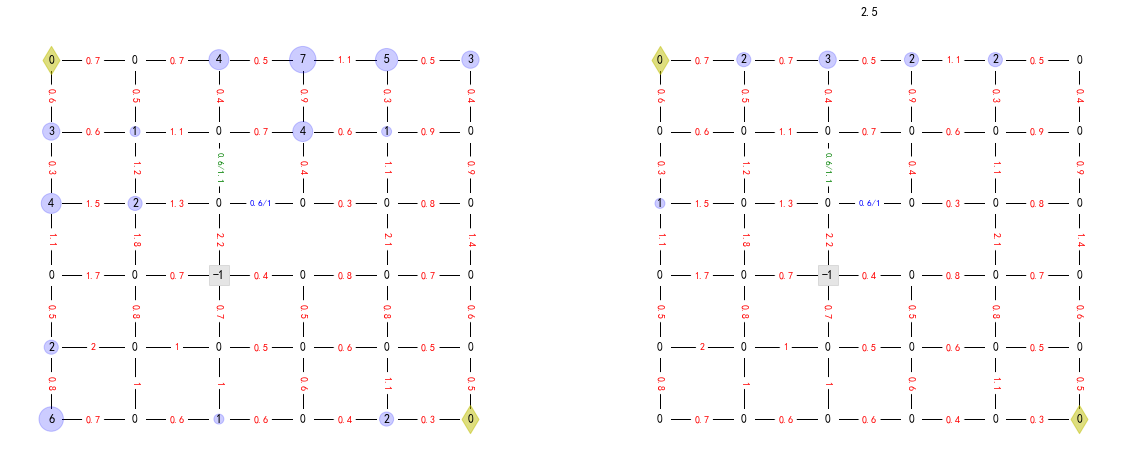

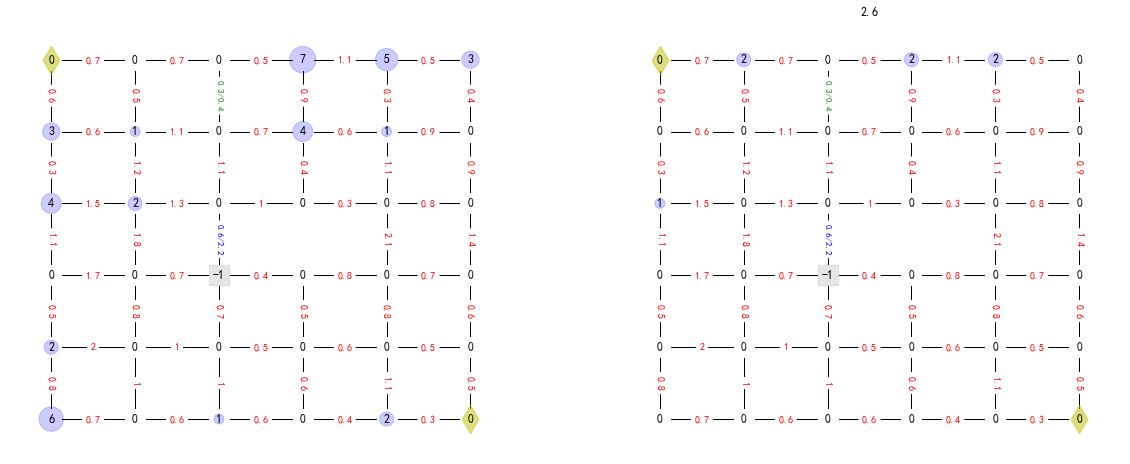

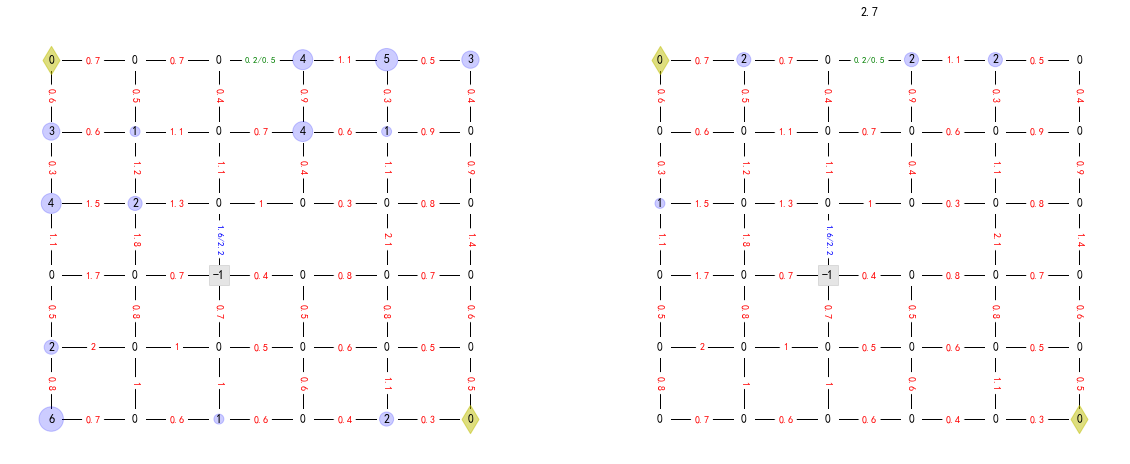

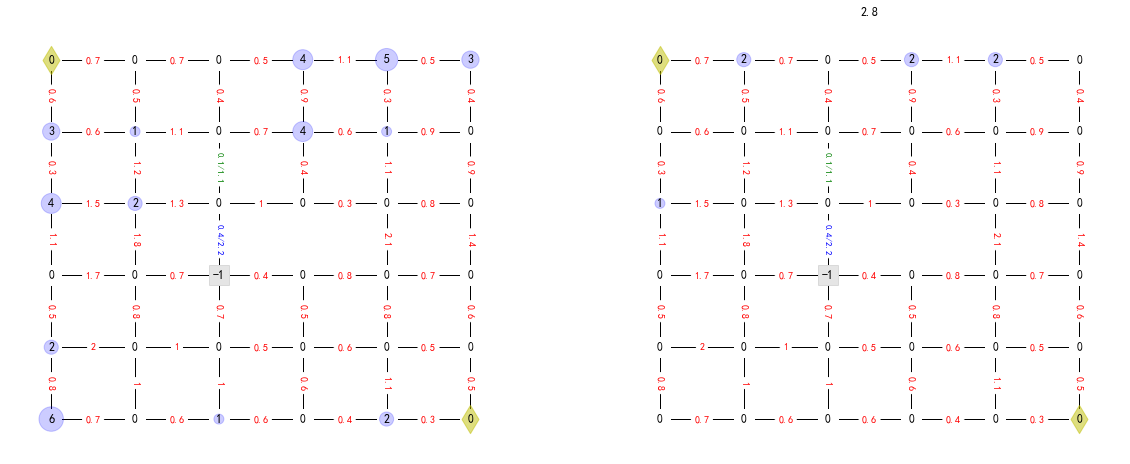

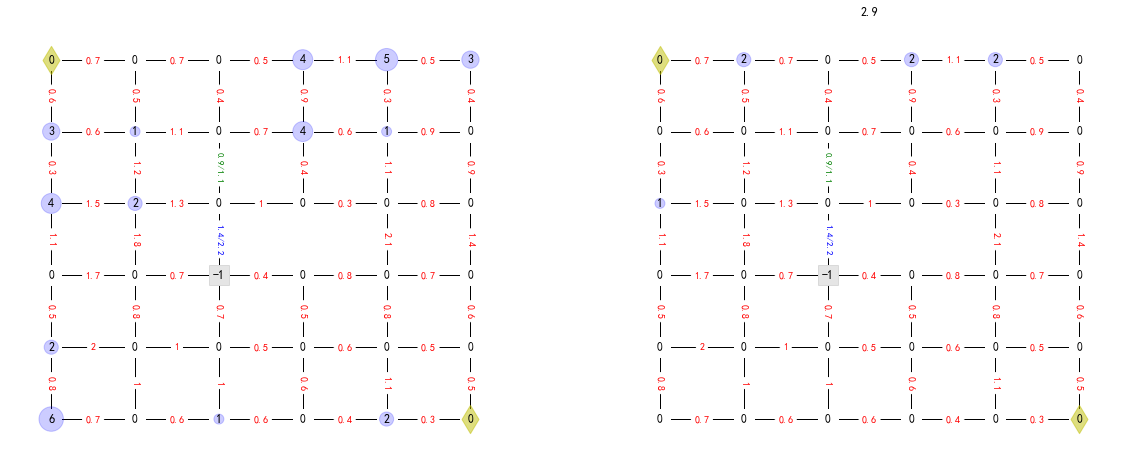

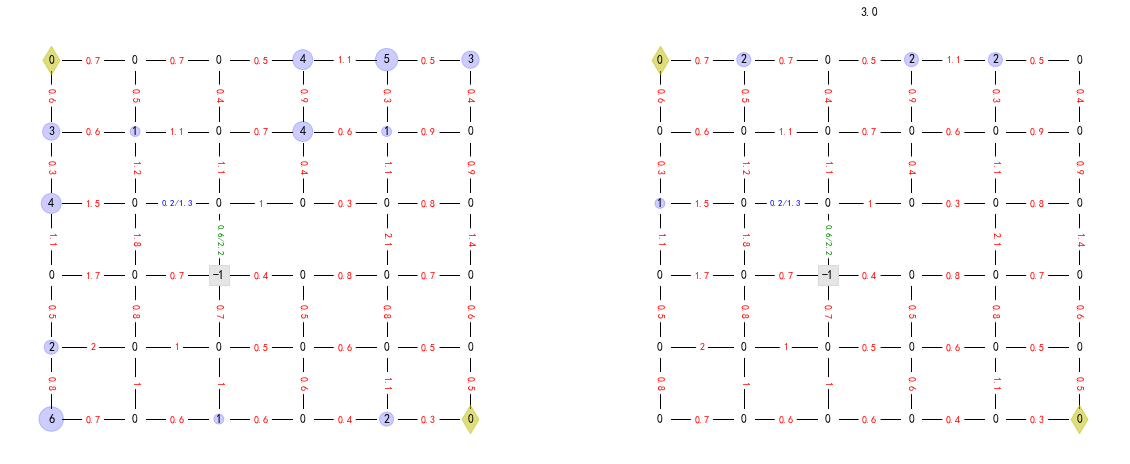

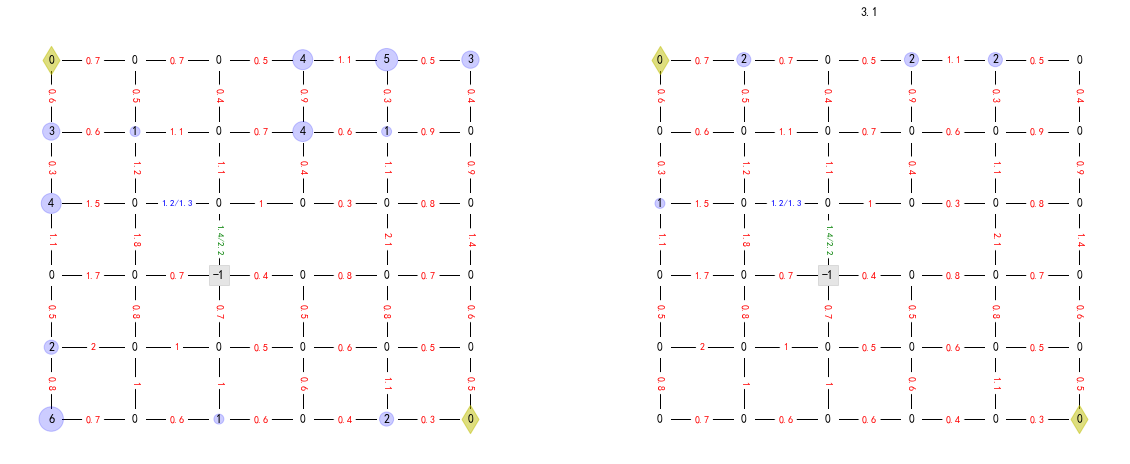

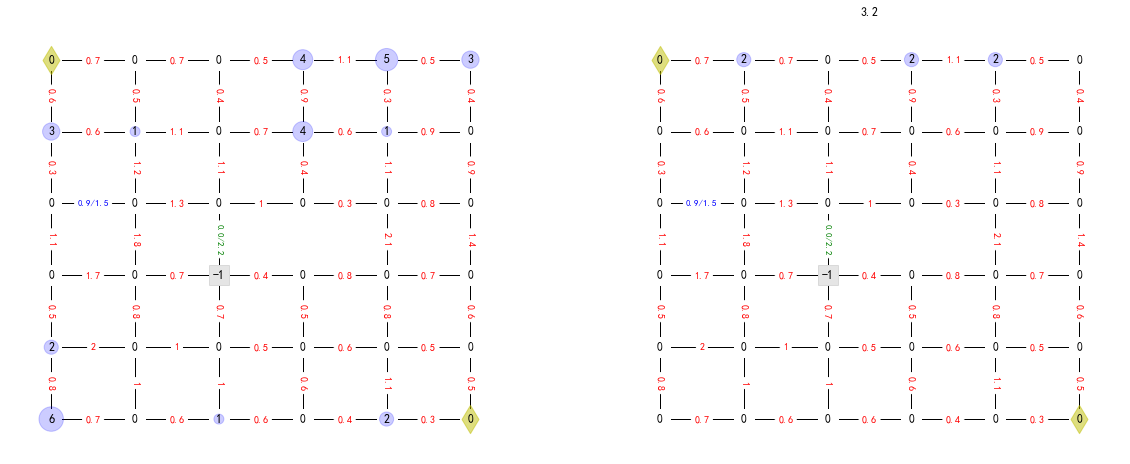

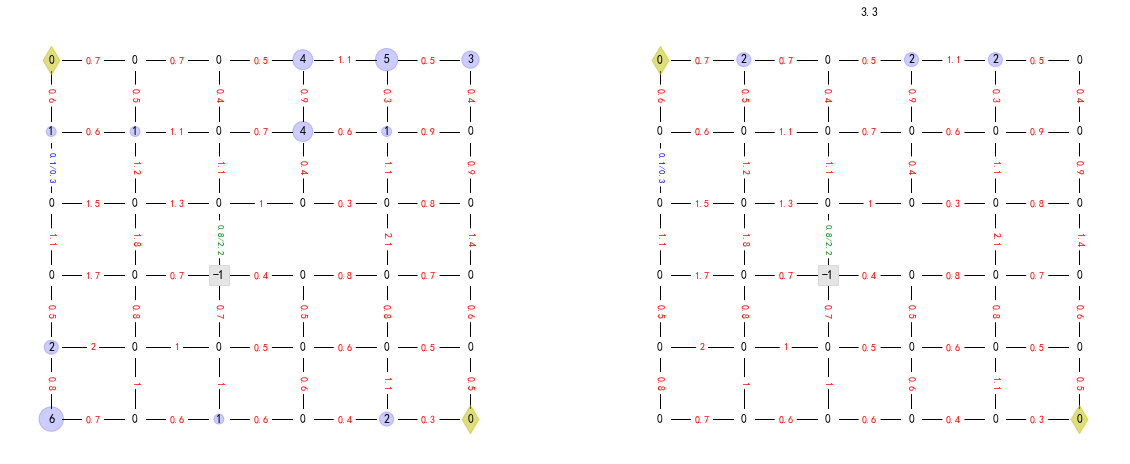

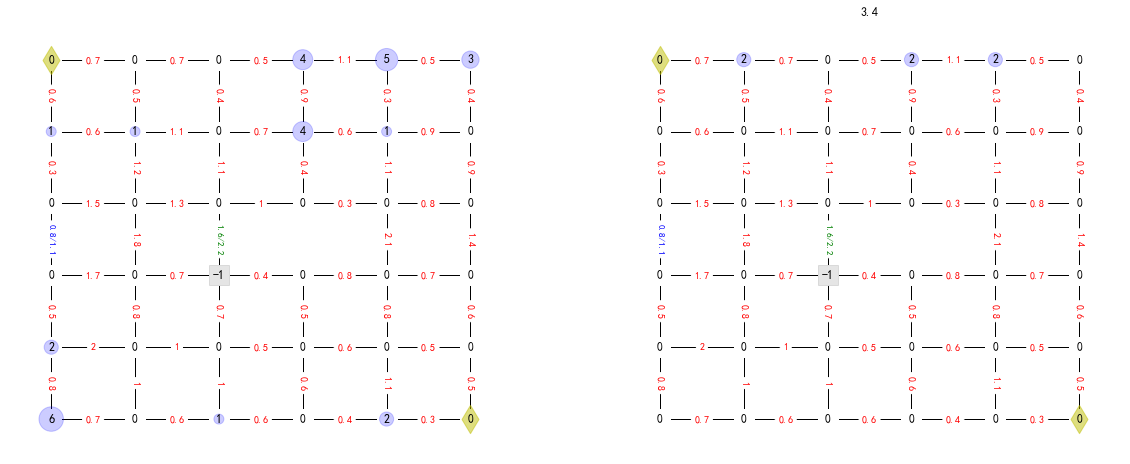

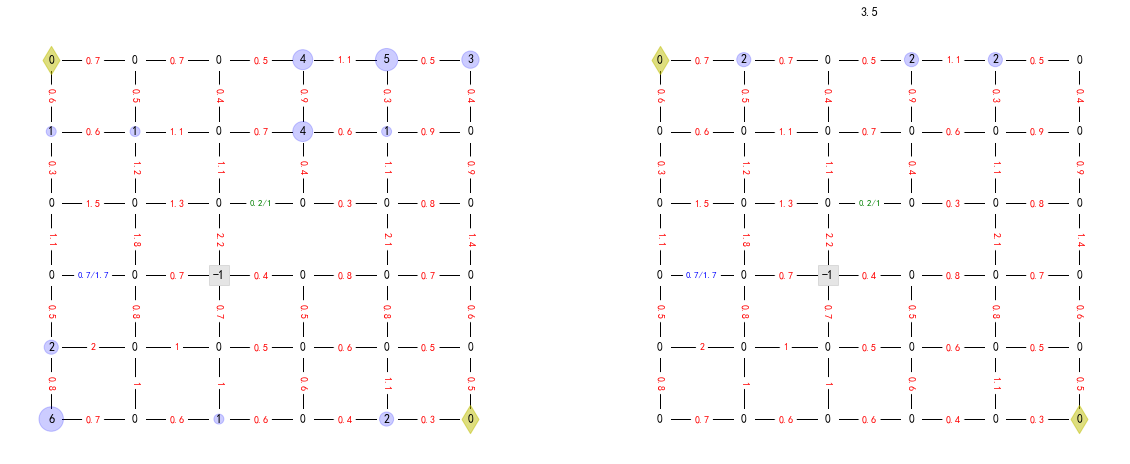

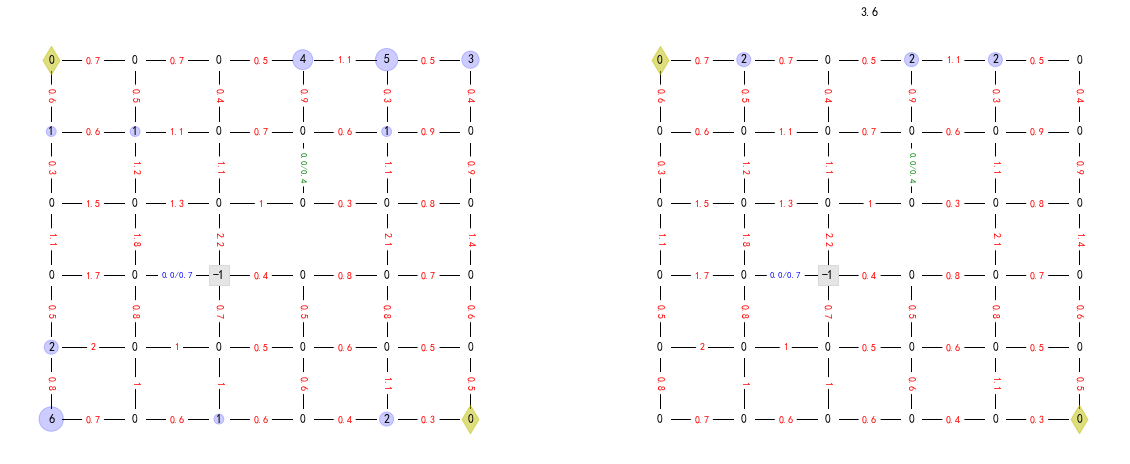

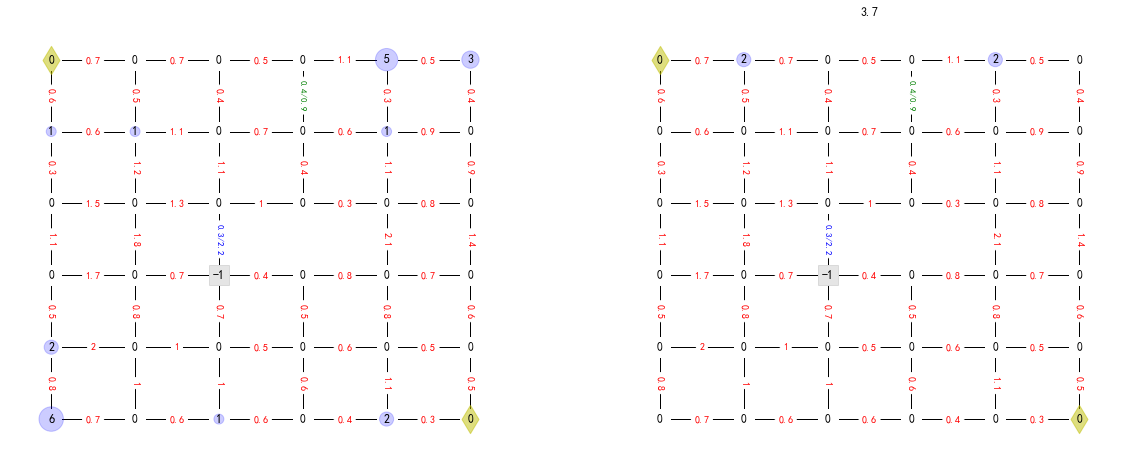

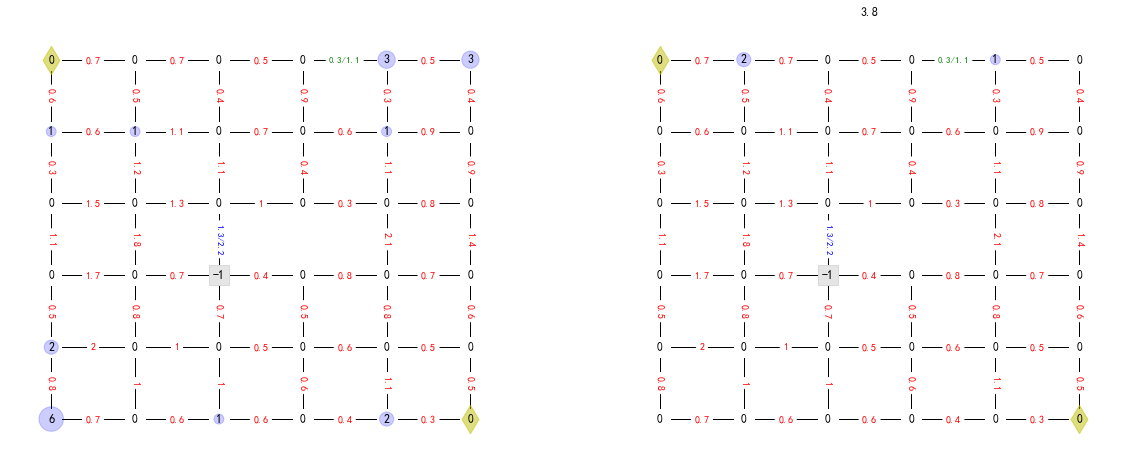

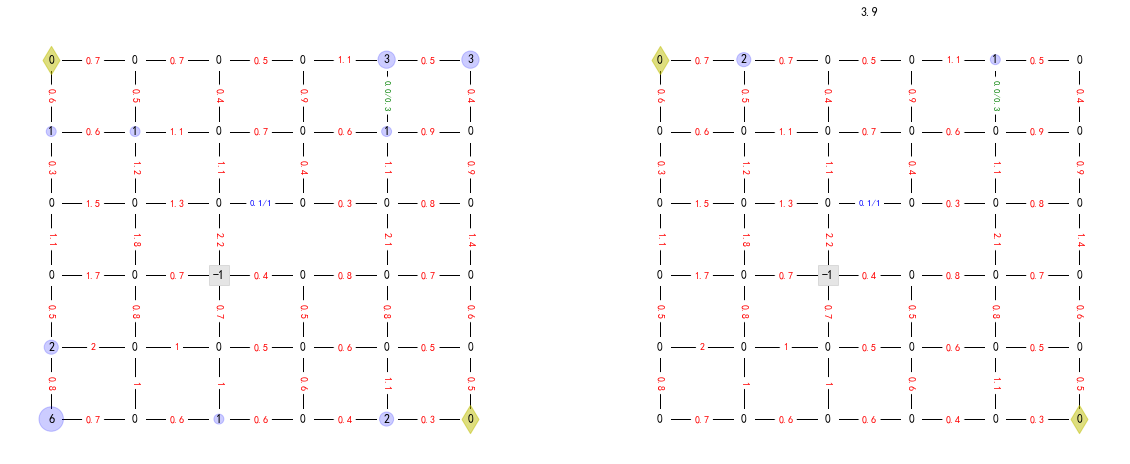

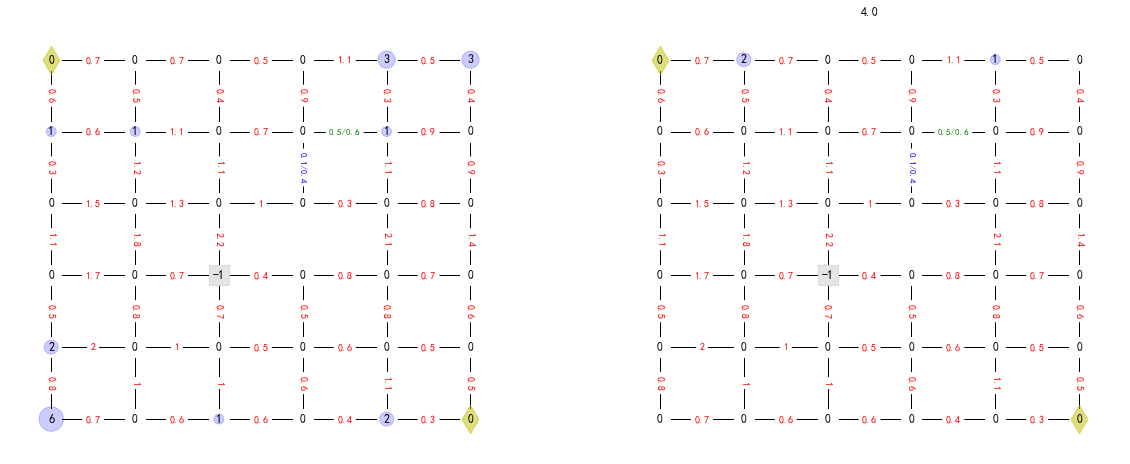

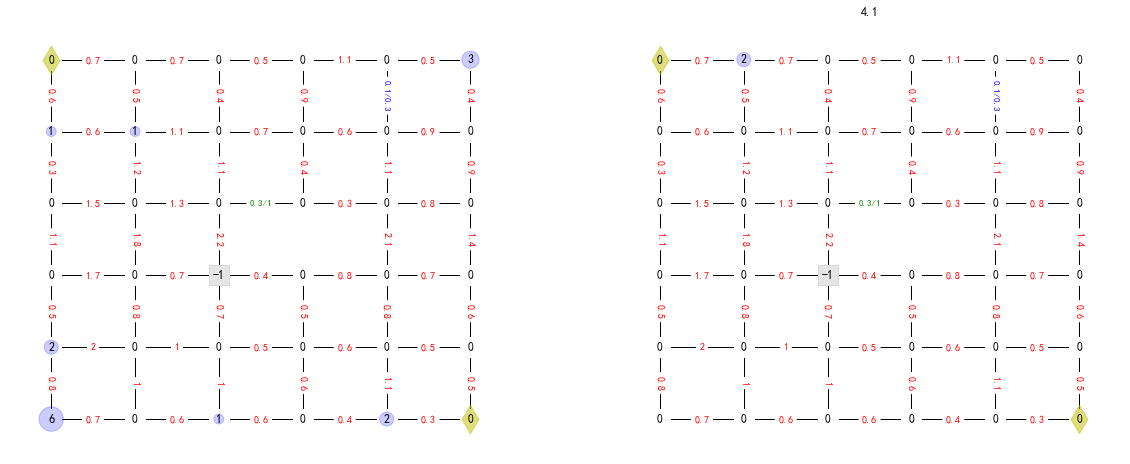

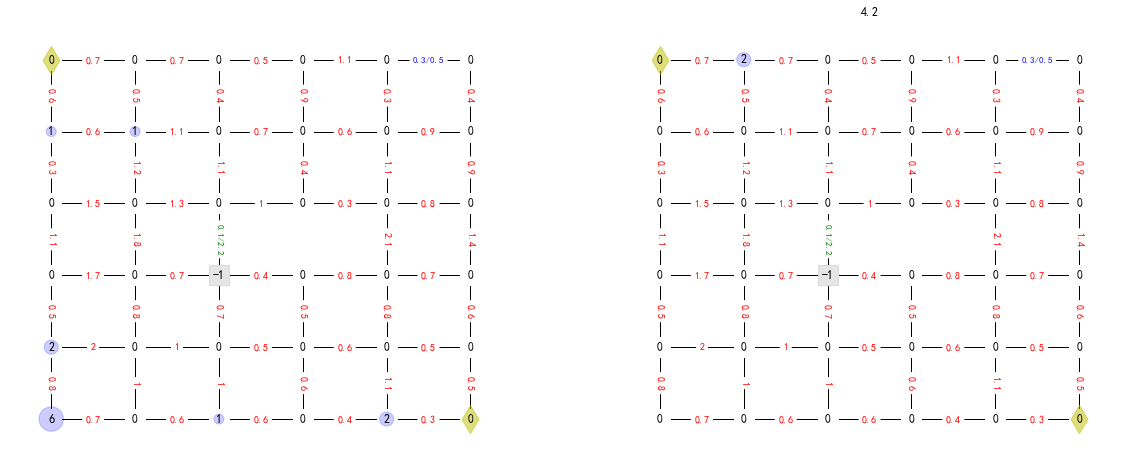

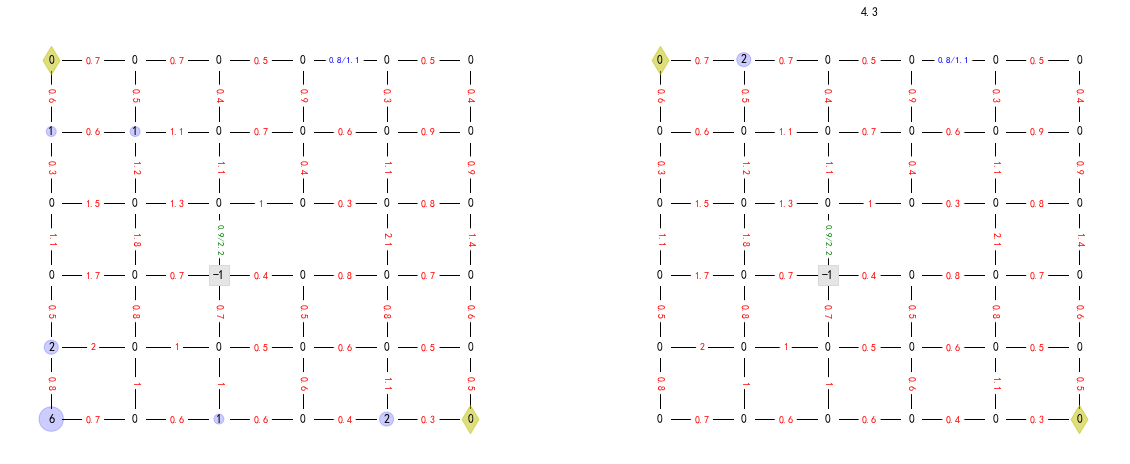

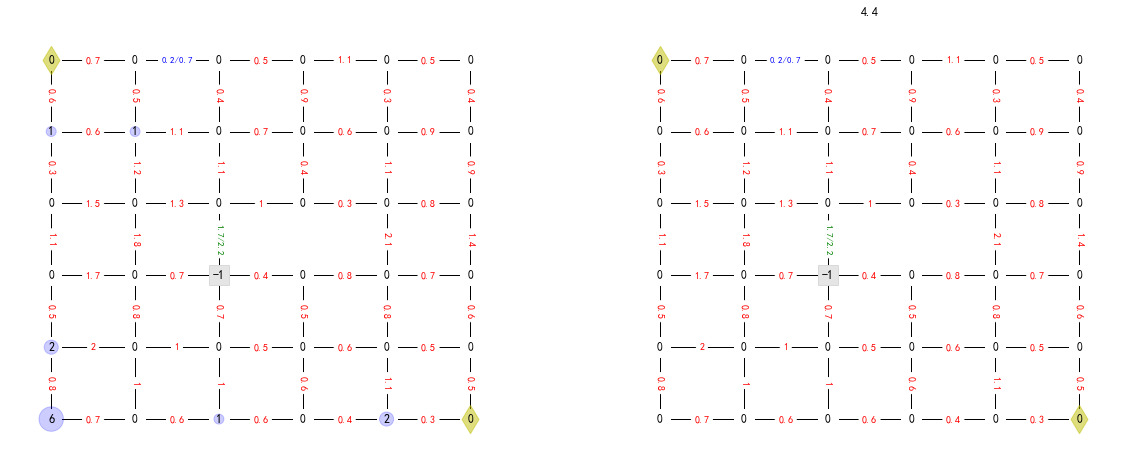

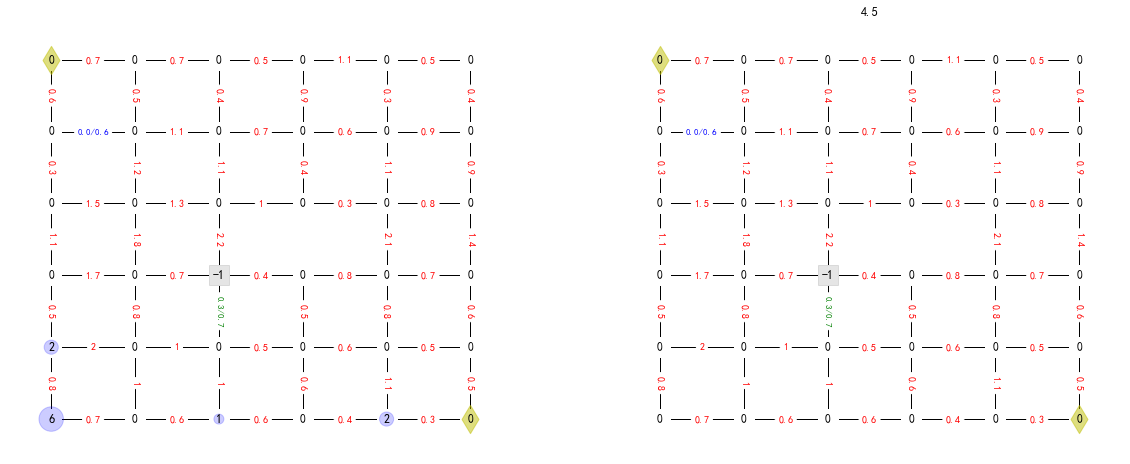

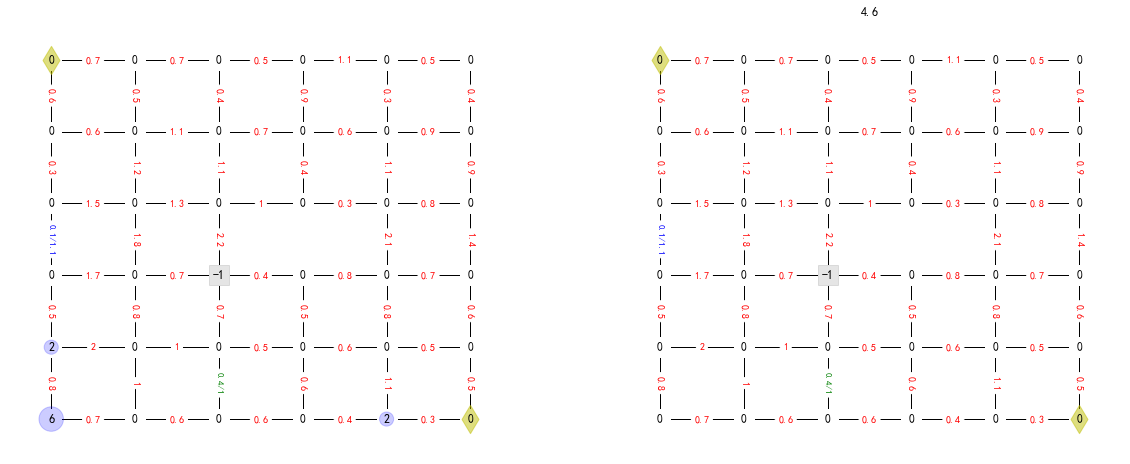

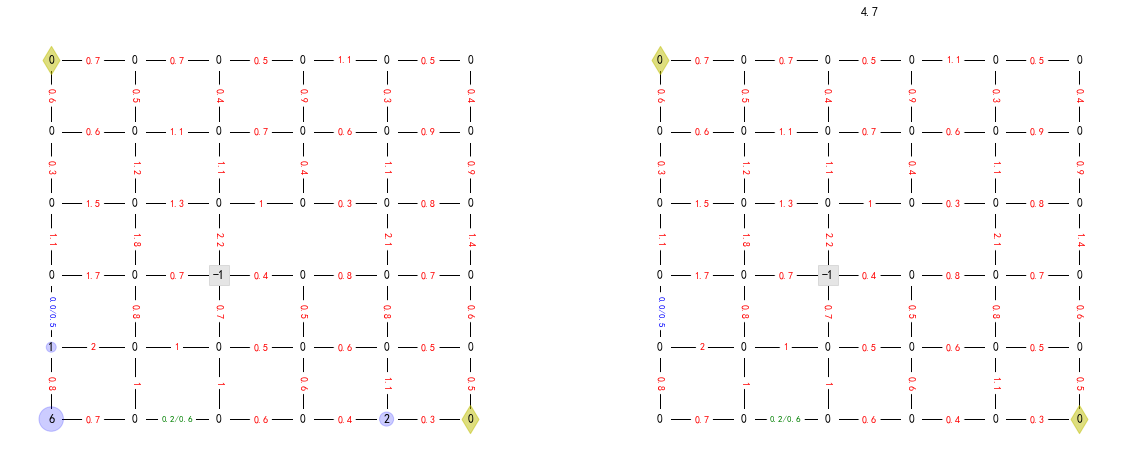

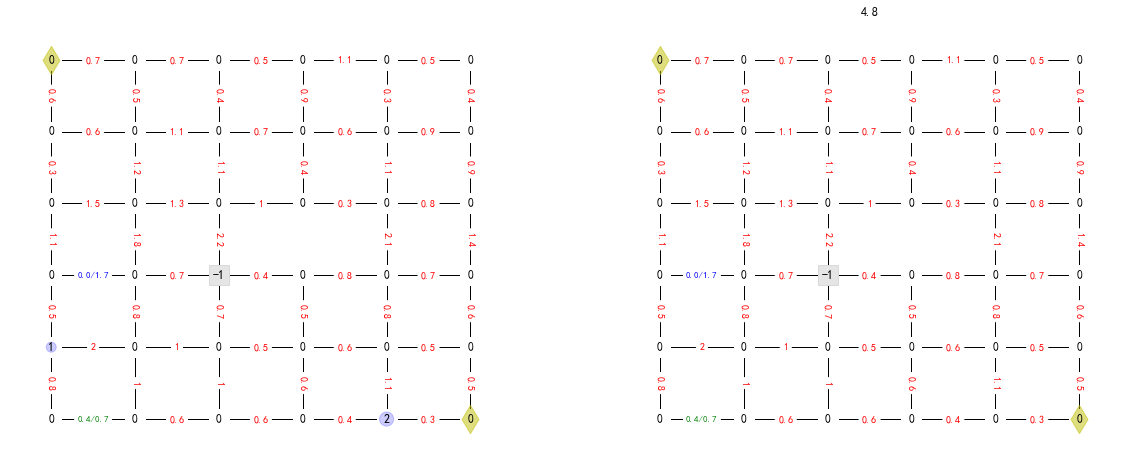

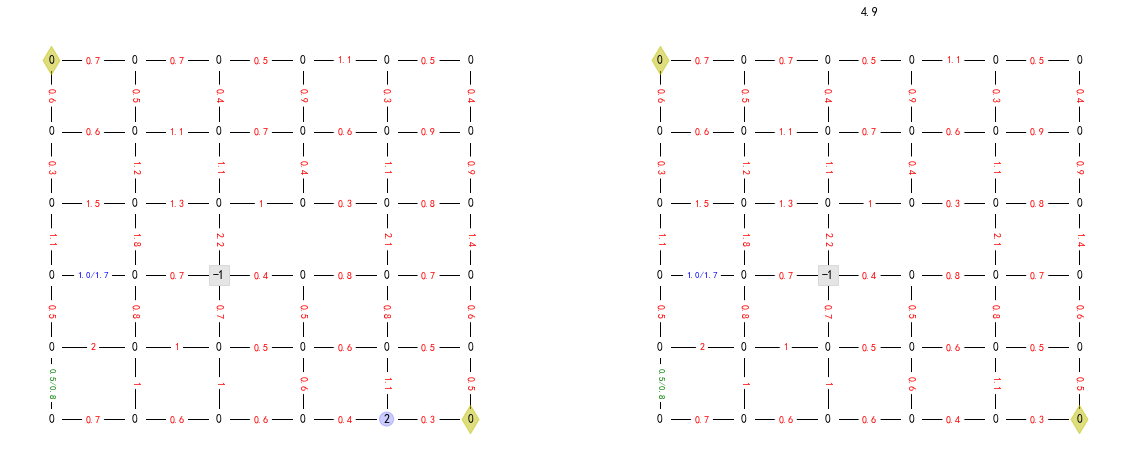

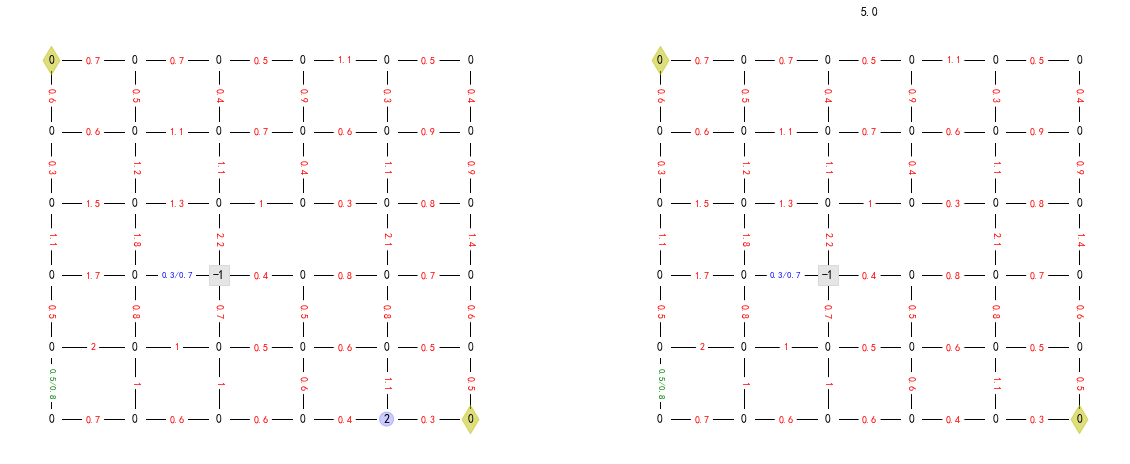

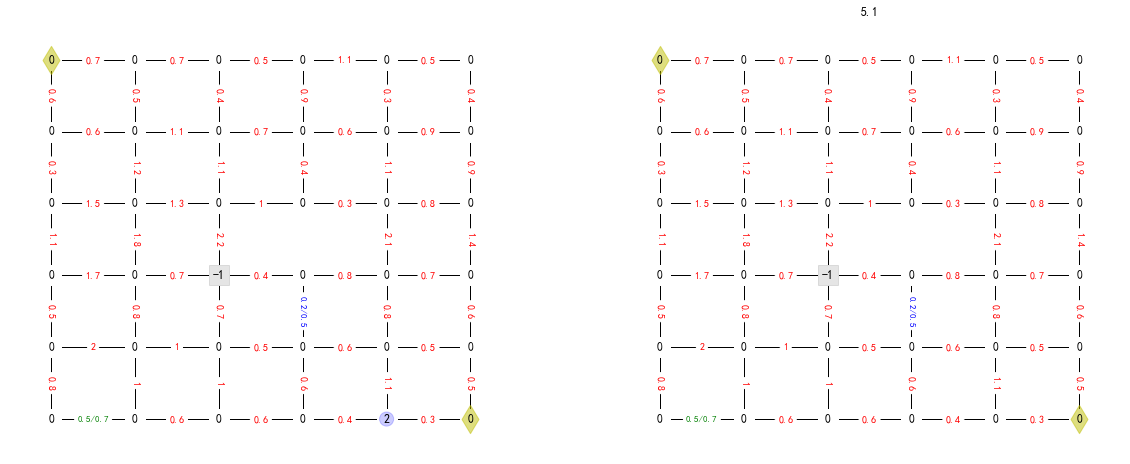

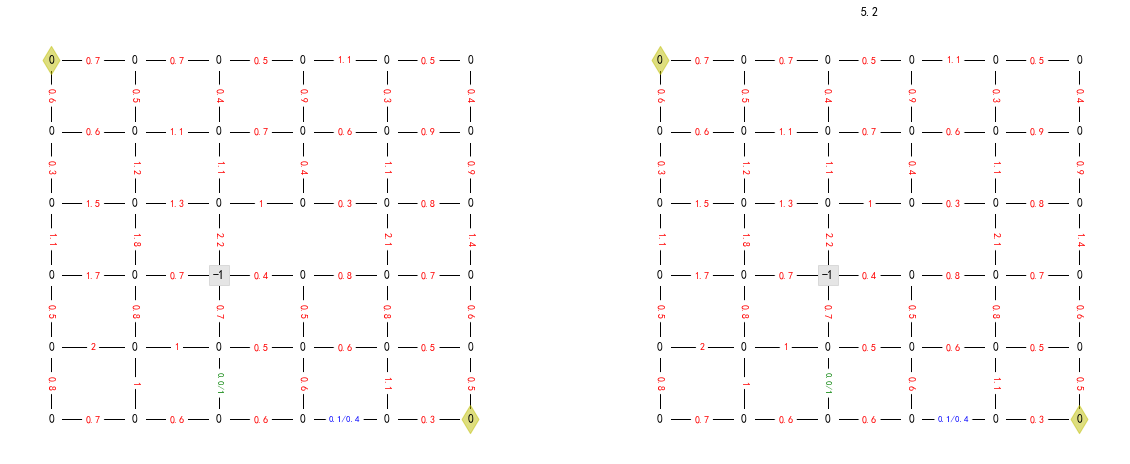

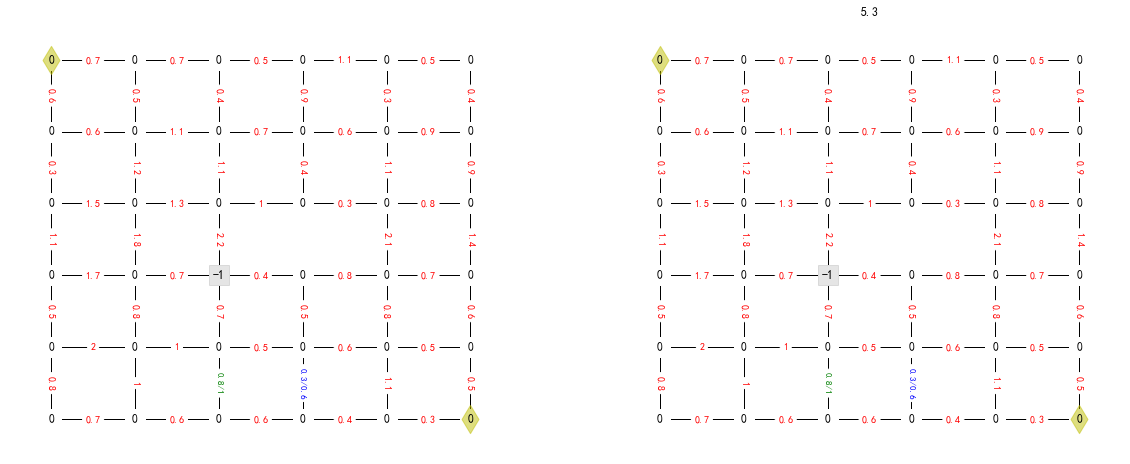

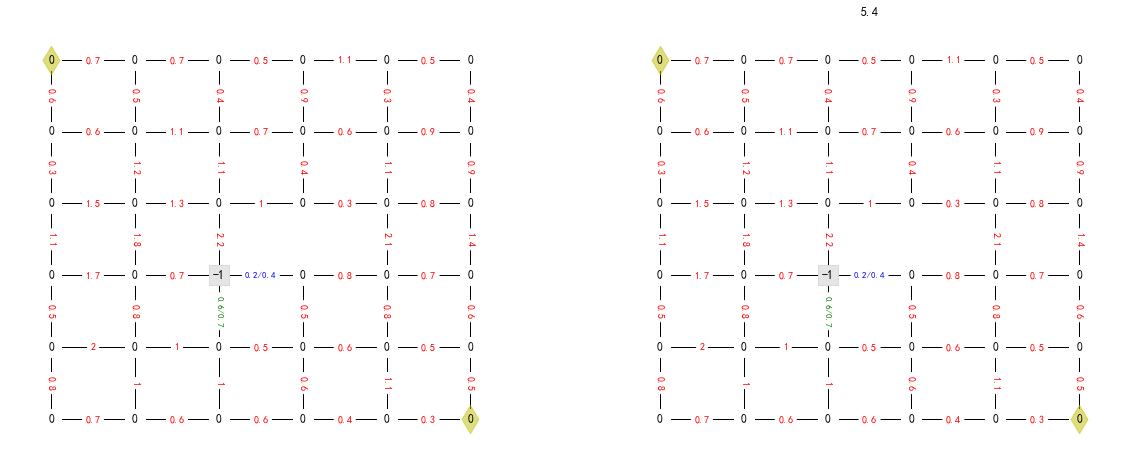

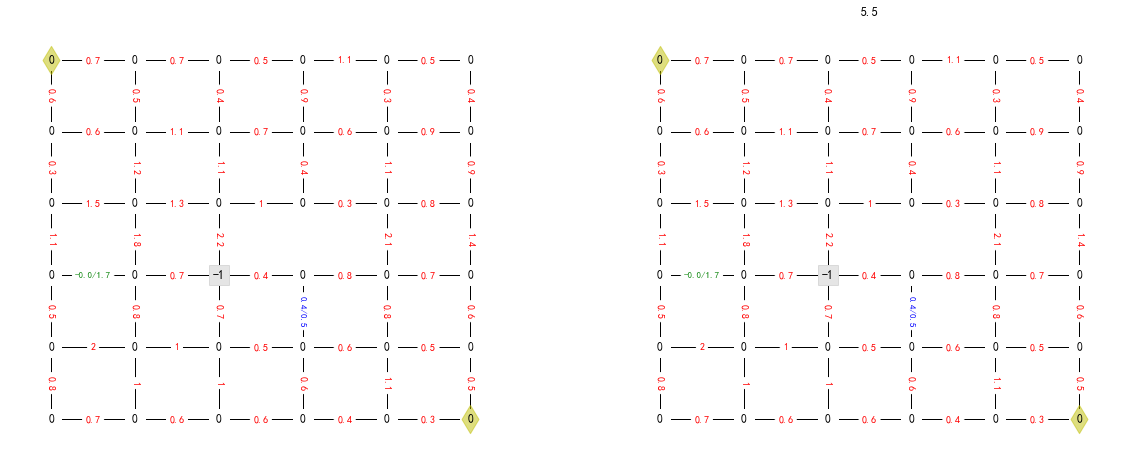

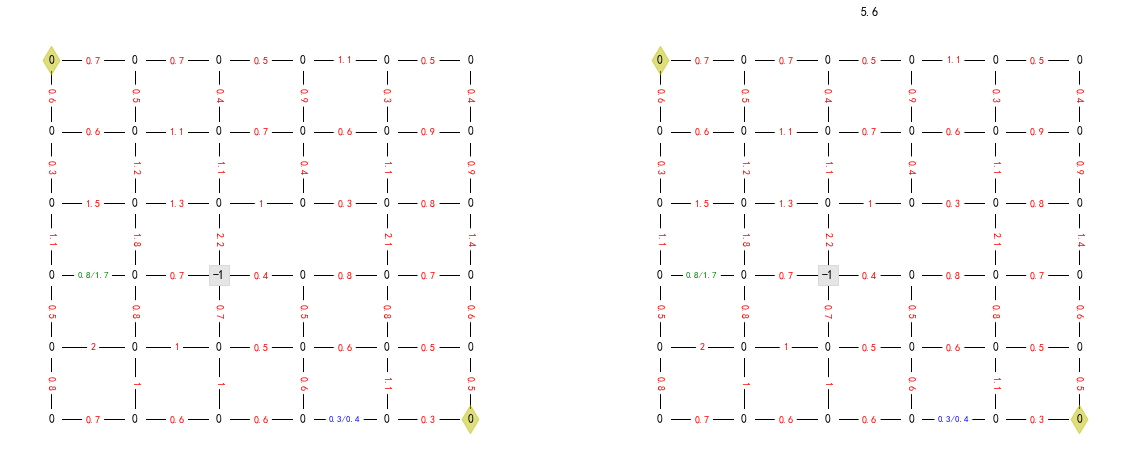

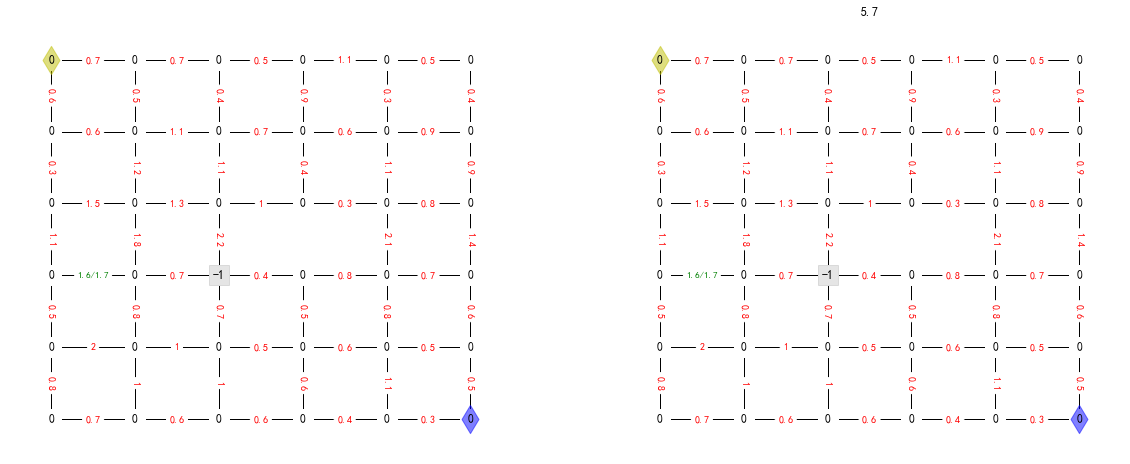

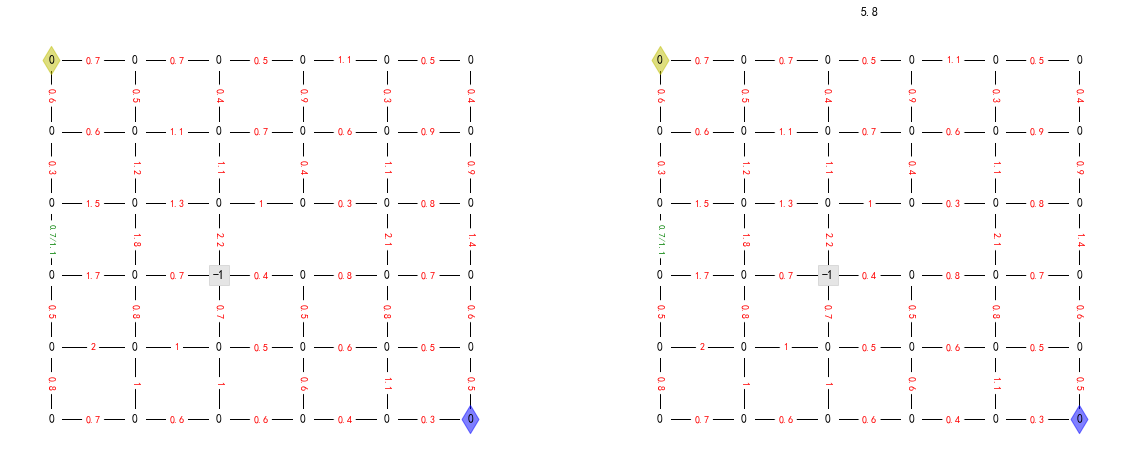

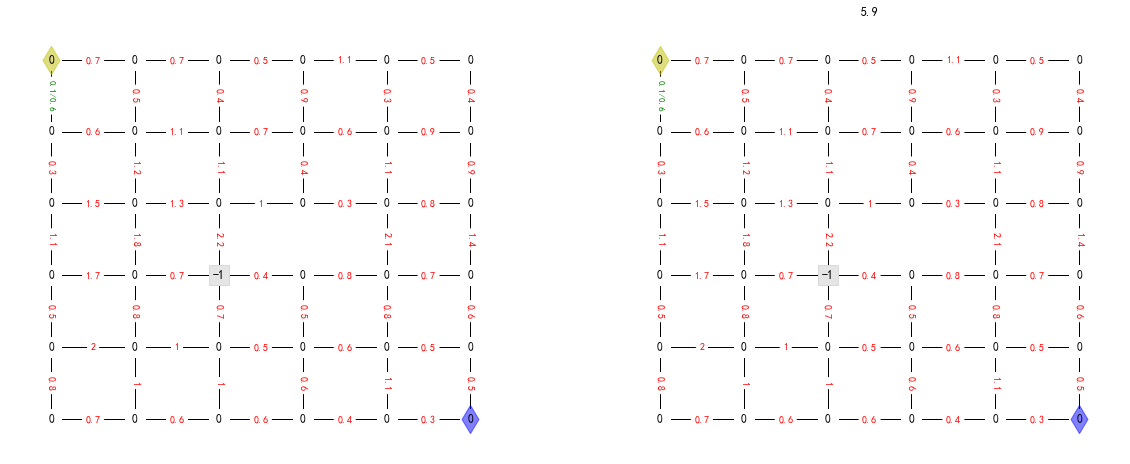

In [95]:
initial=3
A=Robot_plus(G,10,(0,0),8,initial,[5, 10, -1])
B=Robot_plus(G,10,(5,5),10,initial,[0.2, 4, -5])
G_change = copy.deepcopy(G)
T=[0]
images = []
print("开始运行")
All_data=np.array([[0,(0,0),(0,0),0,0,(5,5),(5,5),0,0]],dtype=object)
# 整体书目（现存加）归零则终止
Returning=np.sum([value for node,value in G_change.nodes(data='return')])+1
Borrowing=np.sum([value for node,value in G_change.nodes(data='borrow')])+1
dt=0.0025

while (Returning+Borrowing) >=0:
# while T[-1]<7.4:
    t=T[-1]
#     print(f"\nTime: {t}")
    
    for robot in [A,B]:#对两个机器人分别进行考虑
        robot.map_data = G_change #更新信息
        current_road_time=robot.length_time
        T_diff=round(current_road_time-t+robot.time,4)

        
        # 机器人回收书籍过程
        if robot.indicator==1:                   
            # 尚在前进
            if T_diff>(0.1*dt) :#在路途中,留一定误差
                continue
            # 恰好到达
            else:
                robot.current_location=robot.goal_location
                robot.time=robot.time+robot.length_time
                
#                 print(f"已到达{robot.current_location}")
                
                # 容量未满(允许携带未送出的书目返回)
                if ((robot.book_return<(robot.capacity-robot.book_borrow)) and (Returning-A.book_return-B.book_return)>0):
                    Length,Next,Update_book=robot.find_valuable_path_to_load()
                    robot.goal_location=Next
                    robot.length_time=Length/robot.speed
                    Borrowing-=Update_book[1]
                    Update_book[1]=0
                    
                elif (Borrowing>0 and robot.book_borrow>0) and ((robot.book_return<(robot.capacity-robot.book_borrow)) or (Returning-A.book_return-B.book_return)==0):
                    Length,Next,Update_book=robot.find_valuable_path_to_load()
                    robot.goal_location=Next
                    robot.length_time=Length/robot.speed
                    Borrowing-=Update_book[1]
                    Update_book[1]=0
                    
                # 任务未完(不允许携带未送出的书目返回)
#                 if ((robot.book_return<robot.capacity-robot.book_borrow) and (Returning-A.book_return-B.book_return)>0) or((robot.book_borrow>0):
#                     Length,Next,Update_book=robot.find_valuable_path_to_load()
#                     robot.goal_location=Next
#                     robot.length_time=Length/robot.speed
#                     Borrowing-=Update_book[1]
#                     Update_book[1]=0
                    
                # 容量已满
                else:
                    robot.indicator=2
                    Length,Next=robot.return_to_library()
                    
        # 机器人返回图书馆过程
        elif robot.indicator==2:  
            
            # 尚在前进
            if T_diff>(0.1*dt):#在路途中,留一定误差
                continue
                
            # 恰好到达
            else:
                robot.current_location=robot.goal_location
                robot.time=robot.time+robot.length_time
                Length,Next=robot.return_to_library()
                robot.length_time=Length/robot.speed
                robot.goal_location=Next
                
                
                # 回到图书馆
                if robot.current_location==(3,2):
                    Returning=Returning-robot.book_return
                    robot.book_return=0
#                     print("已回到图书馆")

                    # 继续出发
                    if (Returning-A.book_return-B.book_return)>0 or Borrowing>0:
                        robot.indicator=1
                        if Borrowing>0:
                            robot.book_borrow=robot.initial_borrow
                        else:
                            robot.book_borrow=0
                        Length,Next,Update_book=robot.find_valuable_path_to_load()
                        robot.length_time=Length/robot.speed
                        robot.goal_location=Next
                    
                    # 返回充电桩
                    elif ((Returning-A.book_return-B.book_return) <= 0) and (Borrowing==0):
                        robot.indicator=3
                        Length,Next=robot.return_to_origion()
                        robot.goal_location=Next
                        robot.length_time=Length/robot.speed
                
        elif robot.indicator==0:
            robot.indicator=1
            Length,Next,Update_book=robot.find_valuable_path_to_load()
            robot.goal_location=Next
            
        # 机器人返回充电桩过程    
        elif robot.indicator==3:
            # 尚在前进
            if T_diff>(0.1*dt) :#在路途中,留一定误差
                continue
                
            # 恰好到达
            else:
                robot.current_location=robot.goal_location
                robot.time=robot.time+robot.length_time
                Length,Next=robot.return_to_origion()
                
                # 回到图充电桩
                if robot.current_location==robot.origin_location:
                    robot.indicator=10
                    print("该车已经返回充电桩")
                    if A.indicator*B.indicator==100:
                        Returning=-1
            
        G_change = robot.map_data
        
        ##全部信息
#     print("Robot A:")
#     attributes = vars(A)
#     for attribute, value in attributes.items():
#         print(f"{attribute}: {value}")

#     print("Robot B:")
#     attributes = vars(B)
#     for attribute, value in attributes.items():
#         print(f"{attribute}: {value}")
        
    new_row = np.array([t, A.current_location, A.goal_location,A.book_return,A.book_borrow, B.current_location, B.goal_location,B.book_return,B.book_borrow])
    All_data = np.vstack([All_data, new_row])
    
    
#     if (np.mod(t*10000,0.01*10000)==0):
    if (np.mod(t*10000,0.1*10000)==0):
#     if (np.mod(t*10000,0.01*10000)==0) and Returning<-10:
#         print(t)
#         print("时间差，距离差，理论距离差，图书，指标，时间")
#         print("A",round((A.length_time-t+A.time),4),
#               round(A.speed*(A.length_time-t+A.time),4),
#               A.length_time*A.speed,A.book,A.indicator,A.time)
#         print("B",round(B.length_time-t+B.time,4)
#               ,round(B.speed*(B.length_time-t+B.time),4)
#               ,B.length_time*B.speed,B.book,B.indicator,B.time)
#         print(t,A.current_location,A.goal_location,B.current_location,B.goal_location,Returning,"\n") 
        plt.figure(figsize=(20, 8))
        plt.subplot(1,2,1)
        #以固定位置绘制格点
        pos = {}
        for i in range(len(grid_data_borrow)):
            for j in range(len(grid_data_borrow[i])):
                pos[(i, j)] = (j, len(grid_data_borrow)-i-1)

        #绘制无向图
        nx.draw(G_change, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

        #绘制节点值
        node_labels = nx.get_node_attributes(G_change, 'return')
        nx.draw_networkx_labels(G_change, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

        #绘制边权值
        edge_labels = nx.get_edge_attributes(G_change, 'weight')
        nx.draw_networkx_edge_labels(G_change, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

        # 创建一个节点大小字典
        node_sizes = [node[1]['return']*100 for node in G_change.nodes(data=True)]

        # 以固定位置绘制圆形
        nx.draw_networkx_nodes(G_change, pos, node_size=node_sizes, node_color='b', alpha=0.2)
        nx.draw_networkx_nodes(G_change, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='black', alpha=0.1)

        if A.goal_location!=A.current_location:
            edge_labels_A = {order_edge((A.goal_location, A.current_location)): 
                             f'{round(A.speed*(t-A.time),3)}/{edge_labels[order_edge((A.goal_location, A.current_location))]}'}
            nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_A, font_size=9, font_color='g')
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='y', alpha=0.5)

        else:
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='g', alpha=0.5)

        if B.goal_location!=B.current_location:

            edge_labels_B = {order_edge((B.goal_location, B.current_location)): 
                             f'{round((t-B.time)*B.speed,3)}/{edge_labels[order_edge((B.goal_location, B.current_location))]}'}
            nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_B, font_size=9, font_color='b')
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)
        else:
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='b', alpha=0.5)
        
        
        plt.subplot(1,2,2)
        #绘制无向图
        nx.draw(G_change, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

        #绘制节点值
        node_labels = nx.get_node_attributes(G_change, 'borrow')
        nx.draw_networkx_labels(G_change, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

        #绘制边权值
        edge_labels = nx.get_edge_attributes(G_change, 'weight')
        nx.draw_networkx_edge_labels(G_change, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

        # 创建一个节点大小字典
        node_sizes = [node[1]['borrow']*100 for node in G_change.nodes(data=True)]

        # 以固定位置绘制圆形
        nx.draw_networkx_nodes(G_change, pos, node_size=node_sizes, node_color='b', alpha=0.2)
        nx.draw_networkx_nodes(G_change, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='black', alpha=0.1)

        if A.goal_location!=A.current_location:
            edge_labels_A = {order_edge((A.goal_location, A.current_location)): 
                             f'{round(A.speed*(t-A.time),3)}/{edge_labels[order_edge((A.goal_location, A.current_location))]}'}
            nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_A, font_size=9, font_color='g')
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='y', alpha=0.5)

        else:
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='g', alpha=0.5)

        if B.goal_location!=B.current_location:

            edge_labels_B = {order_edge((B.goal_location, B.current_location)): 
                             f'{round((t-B.time)*B.speed,3)}/{edge_labels[order_edge((B.goal_location, B.current_location))]}'}
            nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_B, font_size=9, font_color='b')
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)
        else:
            nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='b', alpha=0.5)

        #显示图形
        plt.axis('off')
        plt.savefig(f'graph_{t}.png')
        images.append(imageio.imread(f'graph_{t}.png'))
        plt.title(f"{t}")
#         plt.show()
#         plt.cla()
    
    
#     print("时间差，距离差，理论距离差，图书，指标，时间")
#     print("A",round((A.length_time-t+A.time),4),"|",
#           round(A.speed*(A.length_time-t+A.time),4),"|",
#           A.length_time*A.speed,"|",A.book_return,"|",A.book_borrow,"|",A.indicator,"|",A.time)
#     print("B",round(B.length_time-t+B.time,4)
#           ,"|",round(B.speed*(B.length_time-t+B.time),4)
#           ,"|",B.length_time*B.speed,"|",B.book_return,"|",B.book_borrow,"|",B.indicator,"|",B.time)
#     print(t,A.current_location,A.goal_location,B.current_location,B.goal_location,Returning,Borrowing,"\n") 

    
    T.append(round(t+dt,4))

print(f"Total time: {T[-2]}")
# imageio.mimsave('graph_[0.1,0.8,-0.05][5,1.5,-10]_3.gif', images, duration=0.1)

# # 显示gif文件
# from IPython.display import Image
# Image(filename="graph_[0.1,0.8,-0.05][5,1.5,-10]_3.gif")
# print(f"Robot A route: {[(A.current_location, A.goal_location)] if A.goal_location is not None else []}")
# print(f"Robot A total time: {sum([length/A.speed for length in nx.shortest_path(G, A.current_location, (0,0), weight='length')]) if A.goal_location is not None else 0}")
# print(f"Robot B route: {[(B.current_location, B.goal_location)] if B.goal_location is not None else []}")
# print(f"Robot B total time: {sum([length/B.speed for length in nx.shortest_path(G, B.current_location, (5,5), weight='length')]) if B.goal_location is not None else 0}")




In [94]:
print(All_data[-130])

[5.64 (3, 1) (3, 0) 0 0 (5, 5) (5, 5) 0 0]


In [96]:
import numpy as np
print()
# 选择第二列
all_data_col2 = All_data[:, 1]
A_trajectory=[]
A_trajectory_r=[]
# 通过比较相邻的元素来找到不同的值
diff_idx = np.nonzero(np.append(True, all_data_col2[1:] != all_data_col2[:-1]))[0]
# 打印不同值的轨迹
for i in range(len(diff_idx)):
    start_idx = diff_idx[i]
#     end_idx = diff_idx[i+1]
#     print(All_data[start_idx, 1])
    A_trajectory.append(All_data[start_idx, 1])
    if All_data[start_idx, 1]==(3,2):
        A_trajectory_r.append([All_data[start_idx, 0],name_node[All_data[start_idx, 1]],0,3])
    elif All_data[start_idx, 1]==(0,0):
        print(f"时间{All_data[start_idx, 0]}")
    else:   
        A_trajectory_r.append([All_data[start_idx, 0],name_node[All_data[start_idx, 1]],All_data[start_idx-1, 3],All_data[start_idx-1, 4]])
print("A的轨迹")
print(A_trajectory)
print("\n")
print(A_trajectory_r)

# 选择第七列
all_data_col6 = All_data[:, 6]
B_trajectory=[]
B_trajectory_r=[]
# 通过比较相邻的元素来找到不同的值
diff_idx = np.nonzero(np.append(True, all_data_col6[1:] != all_data_col6[:-1]))[0]
# 打印不同值的轨迹
for i in range(len(diff_idx)):
    start_idx = diff_idx[i]
#     end_idx = diff_idx[i+1]
#     print(All_data[start_idx, 1])
    B_trajectory.append(All_data[start_idx, 5])
    if All_data[start_idx, 5]==(3,2):
        B_trajectory_r.append([All_data[start_idx, 0],name_node[All_data[start_idx, 5]],0,3])
    elif All_data[start_idx, 5]==(5,5):
        print(f"时间{All_data[start_idx, 0]}")
    else:
        B_trajectory_r.append([name_node[All_data[start_idx, 5]],All_data[start_idx-1, 7],All_data[start_idx-1, 8]])
print("B的轨迹")
print(B_trajectory)
print("\n")
print(B_trajectory_r)


时间0
时间5.9625
A的轨迹
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4), (3, 4), (3, 3), (3, 2), (3, 3), (4, 3), (5, 3), (5, 2), (4, 2), (3, 2), (4, 2), (4, 1), (5, 1), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 2), (1, 2), (2, 2), (3, 2), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (4, 2), (5, 2), (5, 1), (5, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]


[[0.0875, '北辰楼', 6, 0], [0.15, '弥津楼', 10, 0], [0.3, '映雪楼', 10, 0], [0.525, '高洁楼', 10, 0], [0.6125, '图书馆', 0, 3], [0.6625, '分岔路', 0, 3], [0.725, '绿竹楼', 5, 3], [0.8, '汀兰楼', 6, 1], [0.9, '俊采楼', 9, 1], [1.0, '分岔路', 9, 1], [1.05, '图书馆', 0, 3], [1.1, '分岔路', 0, 3], [1.1625, '绿竹楼', 0, 3], [1.2375, '沉璧楼', 6, 3], [1.3125, '清风楼', 7, 3], [1.4375, '景明楼', 7, 3], [1.525, '图书馆', 0, 3], [1.6125, '景明楼', 0, 3], [1.7375, '南溟楼', 1, 3], [1.8625, '长洲楼', 7, 3], [1.9375, '清风楼', 7, 3], [2.0625, '景明楼', 7, 3], [2.15, '图书馆', 0, 3], [2.425, '十字路口

In [50]:
book_r=0
book_b=0
for i in A_trajectory_r:
    print("->"+i[1]+f"(取书{i[2]-book_r}本)(还书{book_b-i[3]}本)", end="")
    book_r=i[2]    
    book_b=i[3]
print("\n")
for i in A_trajectory_r:
    print("->"+i[1]+f"({i[2]-book_r},{book_b-i[3]})", end="")
    book_r=i[2]    
    book_b=i[3]

->北辰楼(取书6本)(还书0本)->弥津楼(取书4本)(还书0本)->映雪楼(取书0本)(还书0本)->高洁楼(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->分岔路(取书0本)(还书0本)->绿竹楼(取书5本)(还书0本)->汀兰楼(取书1本)(还书2本)->俊采楼(取书3本)(还书0本)->分岔路(取书0本)(还书0本)->图书馆(取书-9本)(还书-2本)->分岔路(取书0本)(还书0本)->绿竹楼(取书0本)(还书0本)->沉璧楼(取书6本)(还书0本)->清风楼(取书1本)(还书0本)->景明楼(取书0本)(还书0本)->图书馆(取书-7本)(还书0本)->景明楼(取书0本)(还书0本)->南溟楼(取书1本)(还书0本)->长洲楼(取书6本)(还书0本)->清风楼(取书0本)(还书0本)->景明楼(取书0本)(还书0本)->图书馆(取书-7本)(还书0本)->十字路口(取书0本)(还书0本)->临川楼(取书3本)(还书0本)->秋水楼(取书4本)(还书3本)->皓月楼(取书3本)(还书0本)->秋水楼(取书0本)(还书0本)->临川楼(取书0本)(还书0本)->十字路口(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->十字路口(取书0本)(还书0本)->朱华楼(取书0本)(还书0本)->耸翠楼(取书4本)(还书0本)->皓月楼(取书4本)(还书2本)->雅望楼(取书2本)(还书1本)->朝晖楼(取书0本)(还书0本)->耸翠楼(取书0本)(还书0本)->朱华楼(取书0本)(还书0本)->十字路口(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->景明楼(取书0本)(还书3本)->清风楼(取书1本)(还书0本)->长洲楼(取书0本)(还书0本)->重霄楼(取书6本)(还书0本)->远山楼(取书1本)(还书0本)->重霄楼(取书0本)(还书0本)->长洲楼(取书0本)(还书0本)->清风楼(取书0本)(还书0本)->景明楼(取书0本)(还书0本)->图书馆(取书-8本)(还书-3本)->高洁楼(取书0本)(还书3本)->凌云楼(取书0本)(还书0本)->芳邻楼(取书0本)(还书0本)->四美楼(取书0本)(还书0本)

->北辰楼(6,0)->弥津楼(4,0)->映雪楼(0,0)->高洁楼(0,0)->图书

In [62]:
book_r=0
book_b=0
for i in B_trajectory_r:
    print("->"+i[1]+f"(取书{i[2]-book_r}本)(还书{book_b-i[3]}本)", end="")
    book_r=i[2]    
    book_b=i[3]
print("\n")
for i in B_trajectory_r:
    print("->"+i[1]+f"({i[2]-book_r},{book_b-i[3]})", end="")
    book_r=i[2]    
    book_b=i[3]

->长风楼(取书5本)(还书0本)->汀兰楼(取书5本)(还书0本)->绿竹楼(取书0本)(还书0本)->分岔路(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->景明楼(取书6本)(还书0本)->南溟楼(取书2本)(还书1本)->高洁楼(取书0本)(还书0本)->图书馆(取书-8本)(还书-1本)->高洁楼(取书4本)(还书0本)->凌云楼(取书2本)(还书0本)->远山楼(取书3本)(还书2本)->凌云楼(取书0本)(还书0本)->高洁楼(取书0本)(还书0本)->图书馆(取书-9本)(还书-2本)->十字路口(取书0本)(还书0本)->朱华楼(取书2本)(还书3本)->流丹楼(取书8本)(还书0本)->俊采楼(取书0本)(还书0本)->分岔路(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->分岔路(取书0本)(还书0本)->俊采楼(取书0本)(还书0本)->东隅楼(取书1本)(还书0本)->万千楼(取书2本)(还书2本)->星耀楼(取书4本)(还书0本)->朝晖楼(取书2本)(还书0本)->耸翠楼(取书0本)(还书0本)->朱华楼(取书0本)(还书0本)->十字路口(取书0本)(还书0本)->图书馆(取书-9本)(还书-2本)->十字路口(取书0本)(还书0本)->映雪楼(取书2本)(还书0本)->芳邻楼(取书4本)(还书1本)->四美楼(取书2本)(还书0本)->芳邻楼(取书0本)(还书0本)->凌云楼(取书0本)(还书0本)->高洁楼(取书0本)(还书0本)->图书馆(取书-8本)(还书-1本)->十字路口(取书0本)(还书0本)->朱华楼(取书0本)(还书0本)->耸翠楼(取书0本)(还书0本)->朝晖楼(取书1本)(还书0本)->雅望楼(取书3本)(还书1本)->郁青楼(取书3本)(还书0本)->雅望楼(取书0本)(还书0本)->皓月楼(取书0本)(还书0本)->秋水楼(取书0本)(还书0本)->北辰楼(取书0本)(还书2本)->弥津楼(取书1本)(还书0本)->四美楼(取书1本)(还书0本)->芳邻楼(取书0本)(还书0本)->凌云楼(取书0本)(还书0本)->远山楼(取书1本)(还书0本)->凌云楼(取书0本)(还书0本)->高洁楼(取书0本)(还书0本)->图书馆(取书-10本)(还书-3本)->分岔路(取书0本

In [71]:
import numpy as np

# 选择第二列
all_data_col2 = All_data[:, 1]
A_trajectory=[]
# 通过比较相邻的元素来找到不同的值
diff_idx = np.nonzero(np.append(True, all_data_col2[1:] != all_data_col2[:-1]))[0]
# 打印不同值的轨迹
for i in range(len(diff_idx)):
    start_idx = diff_idx[i]
#     end_idx = diff_idx[i+1]
#     print(All_data[start_idx, 1])
    A_trajectory.append(All_data[start_idx, 1])
print("A的轨迹")
print(A_trajectory)

A的轨迹
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (3, 4), (3, 3), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (4, 4), (4, 5), (3, 5), (2, 5), (3, 5), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (5, 1), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (0, 5), (0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (3, 1), (3, 0), (2, 0), (1, 0), (1, 1), (0, 1), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]


In [72]:
# 选择第四列
all_data_col4 = All_data[:, 3]
B_trajectory=[]
# 通过比较相邻的元素来找到不同的值
diff_idx = np.nonzero(np.append(True, all_data_col4[1:] != all_data_col4[:-1]))[0]
# 打印不同值的轨迹
for i in range(len(diff_idx)):
    start_idx = diff_idx[i]
#     end_idx = diff_idx[i+1]
#     print(All_data[start_idx, 1])
    B_trajectory.append(All_data[start_idx, 3])
print("B的轨迹")
print(B_trajectory)

B的轨迹
[(5, 5), (4, 5), (4, 4), (4, 3), (3, 3), (3, 2), (4, 2), (5, 2), (4, 2), (3, 2), (3, 3), (4, 3), (5, 3), (4, 3), (3, 3), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4), (0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 4), (1, 4), (1, 3), (2, 3), (2, 2), (3, 2), (3, 1), (2, 1), (2, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5)]


[[ 2.  2.  3.  3.  3.  1.]
 [ 3.  2.  2.  4.  3.  1.]
 [ 4.  2.  8.  5.  1.  1.]
 [ 6.  7. 15.  9.  3.  1.]
 [ 3.  2.  6.  6.  2.  1.]
 [ 2.  3.  4.  4.  2.  2.]]


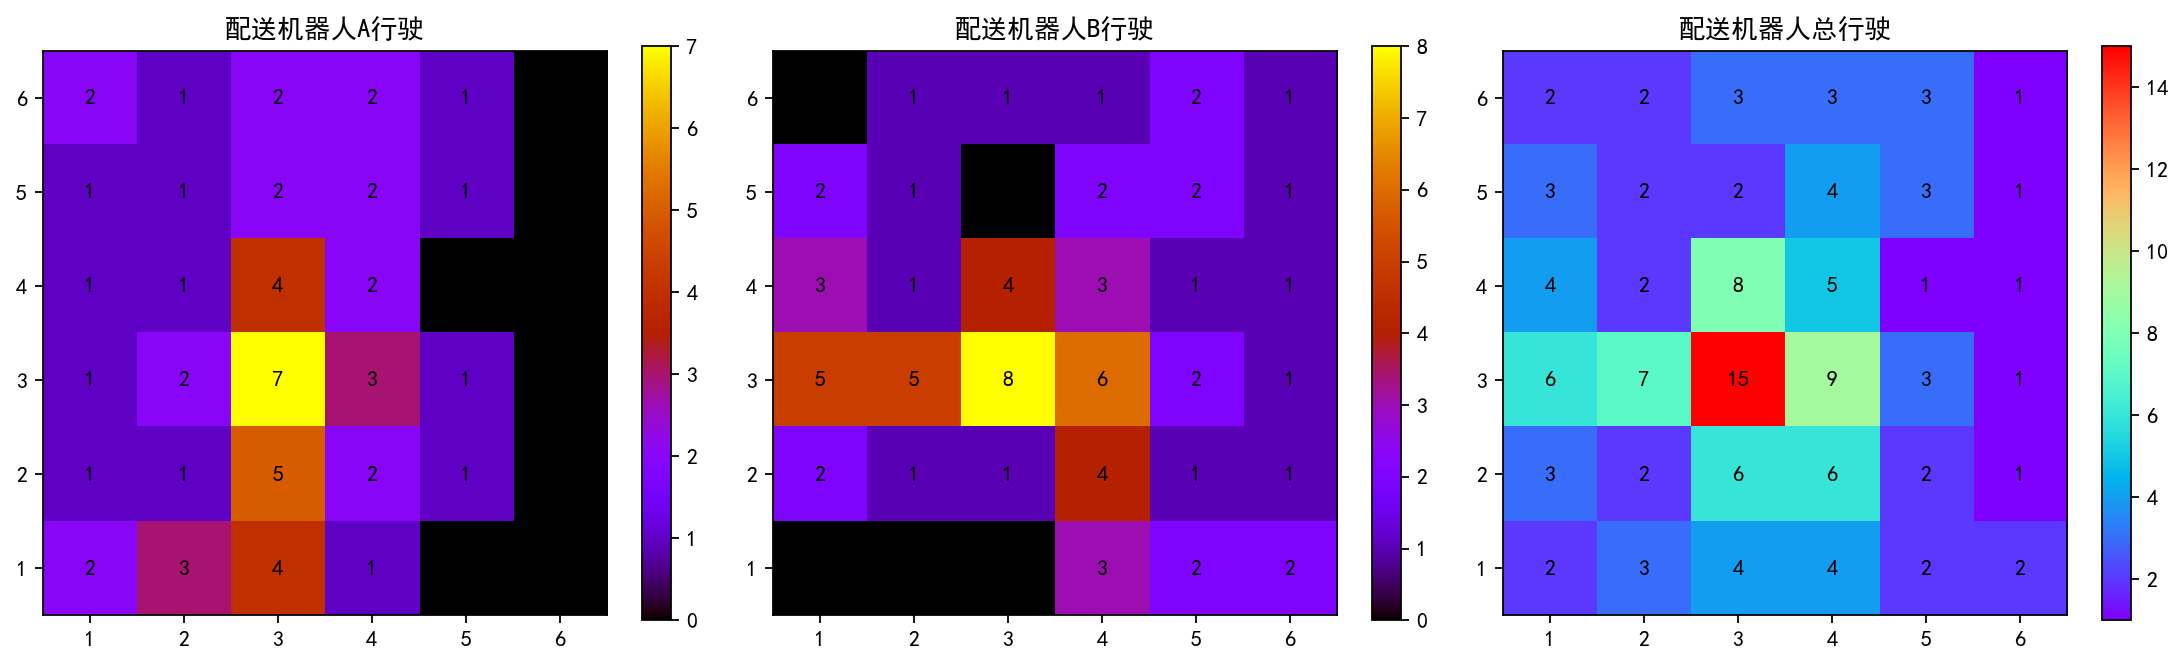

In [25]:
# 绘制热图
def plot_heatmap(trajectory, subplot,t):
    heatmap = np.zeros((6, 6))
    for point in trajectory:
        heatmap[point[0], point[1]] += 1
    ax = plt.subplot(subplot)
    im=ax.imshow(heatmap, extent=[0.5, 6.5, 0.5, 6.5], cmap='gnuplot')
    ax.set_xticks(np.arange(1, 7))
    ax.set_yticks(np.arange(1, 7))
    plt.colorbar(im)
    for i in range(6):
        for j in range(6):
            ax.text(j+1 , 6-i, int(heatmap[i, j]), ha='center', va='center', color='black',weight='bold')
    ax.set_title(t)

# 将多个图像排列在一起
plt.figure(figsize=(14, 4),dpi=160)
plot_heatmap(A_trajectory, 131,"配送机器人A行驶")
plot_heatmap(B_trajectory, 132,"配送机器人B行驶")
heatmap = np.zeros((6, 6))
for point in B_trajectory:
    heatmap[point[0], point[1]] += 1
for point in A_trajectory:
    heatmap[point[0], point[1]] += 1
ax = plt.subplot(133)
im=ax.imshow(heatmap, extent=[0.5, 6.5, 0.5, 6.5], cmap='rainbow')
plt.colorbar(im)
print(heatmap)
ax.set_xticks(np.arange(1, 7))
ax.set_yticks(np.arange(1, 7))
for i in range(6):
    for j in range(6):
        ax.text(j+1 , 6-i, int(heatmap[i, j]), ha='center', va='center', color='black',weight='bold')

ax.set_title('配送机器人总行驶')
plt.tight_layout()
plt.show()

[6, 4, 0, 0]
[0, 5, 1, 3, 0]
[0, 0, 6, 1, 0]
[0, 1, 6, 0, 0]
[0, 3, 4, 3, 0, 0, 0]
[0, 0, 4, 4, 2, 0, 0, 0, 0]
[0, 1, 0, 6, 1, 0, 0, 0, 0]
[0]
[0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0]
[0]
[0]


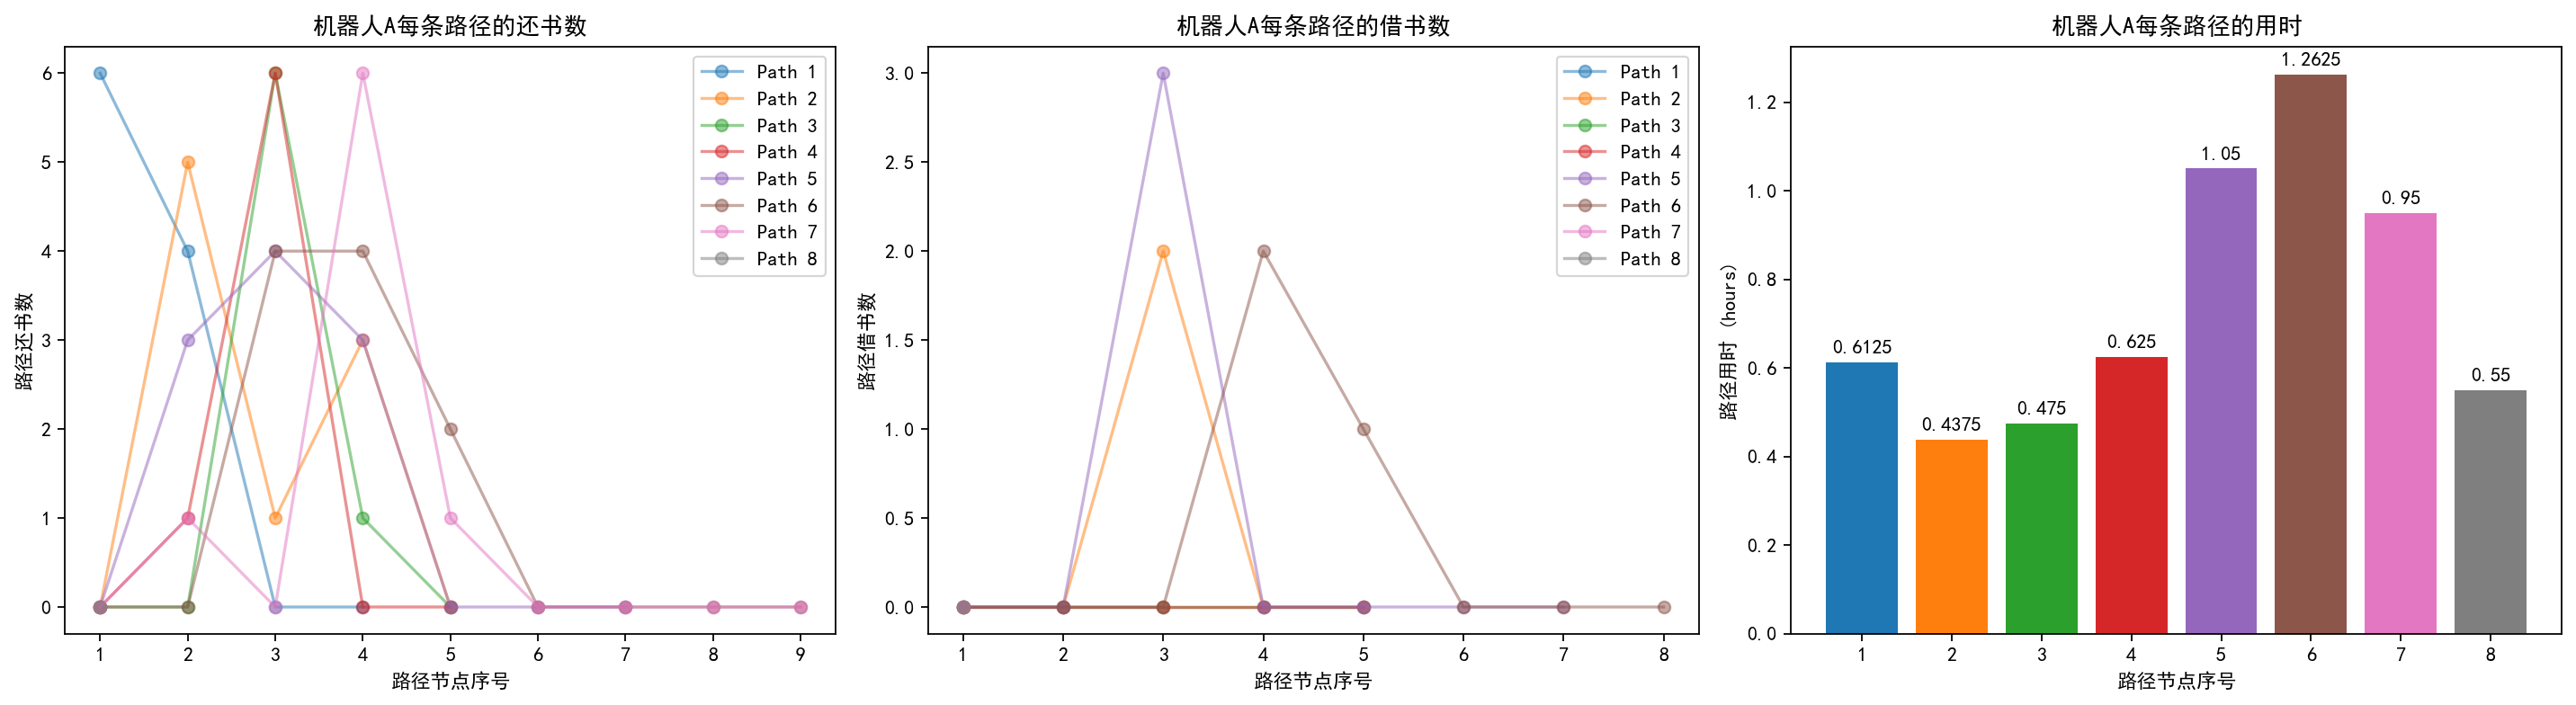

In [111]:
path_return_num = [
    [6,4,0,0],
    [0,5,1,3,0],
    [0,0,6,1,0],
    [0,1,6,0,0],
    [0,3,4,3,0,0,0],
    [0,0,4,4,2,0,0,0,0],
    [0,1,0,6,1,0,0,0,0],
    [0]
]
path_borrow_num = [
    [0],
    [0, 0, 2, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0,3,0,0,0,0],
    [0, 0,0,2,1,0,0,0],
    [0],
    [0]
]
path_time = [0.6125, 0.4375, 0.4750, 0.6250, 1.0500,1.2625,0.9500,0.5500]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
# 绘制路径还书数折线图
plt.figure(figsize=(18, 5),dpi=160)
plt.subplot(1, 3, 1)
for i in range(len(path_return_num)):
    print(path_return_num[i])
    x = [i+1 for i in range(len(path_return_num[i]))]
    y = path_return_num[i]
    plt.plot(x, y, label='Path '+str(i+1),marker="o",alpha=0.5,c=colors[i])
plt.legend()
plt.title('机器人A每条路径的还书数')
plt.xlabel('路径节点序号')
plt.ylabel('路径还书数')
plt.subplot(1, 3, 2)
for i in range(len(path_borrow_num)):
    print(path_borrow_num[i])
    x = [i+1 for i in range(len(path_borrow_num[i]))]
    y = path_borrow_num[i]
    plt.plot(x, y, label='Path '+str(i+1),marker="o",alpha=0.5,c=colors[i])
plt.legend()
plt.title('机器人A每条路径的借书数')
plt.xlabel('路径节点序号')
plt.ylabel('路径借书数')
# 绘制路径用时条形图
plt.subplot(1, 3, 3)
plt.bar(range(len(path_time)), path_time,color=colors)
for i, v in enumerate(path_time):
    plt.text(i, v+0.02, str(v), ha='center')
plt.title('机器人A每条路径的用时')
plt.xlabel('路径节点序号')
plt.ylabel('路径用时 (hours)')
plt.xticks(range(len(path_time)), [i+1 for i in range(len(path_time))])

plt.tight_layout()
plt.show()

[5, 5, 0, 0]
[6, 2, 0]
[4, 2, 3, 0, 0]
[0, 2, 8, 0, 0]
[0, 0, 1, 2, 4, 2, 0, 0, 0]
[0, 2, 4, 2, 0, 0, 0]
[0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0, 0]
[0]
[0]
[0, 1, 0]
[0, 0, 2, 0, 0]
[0, 3, 0, 0, 0]
[0, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]


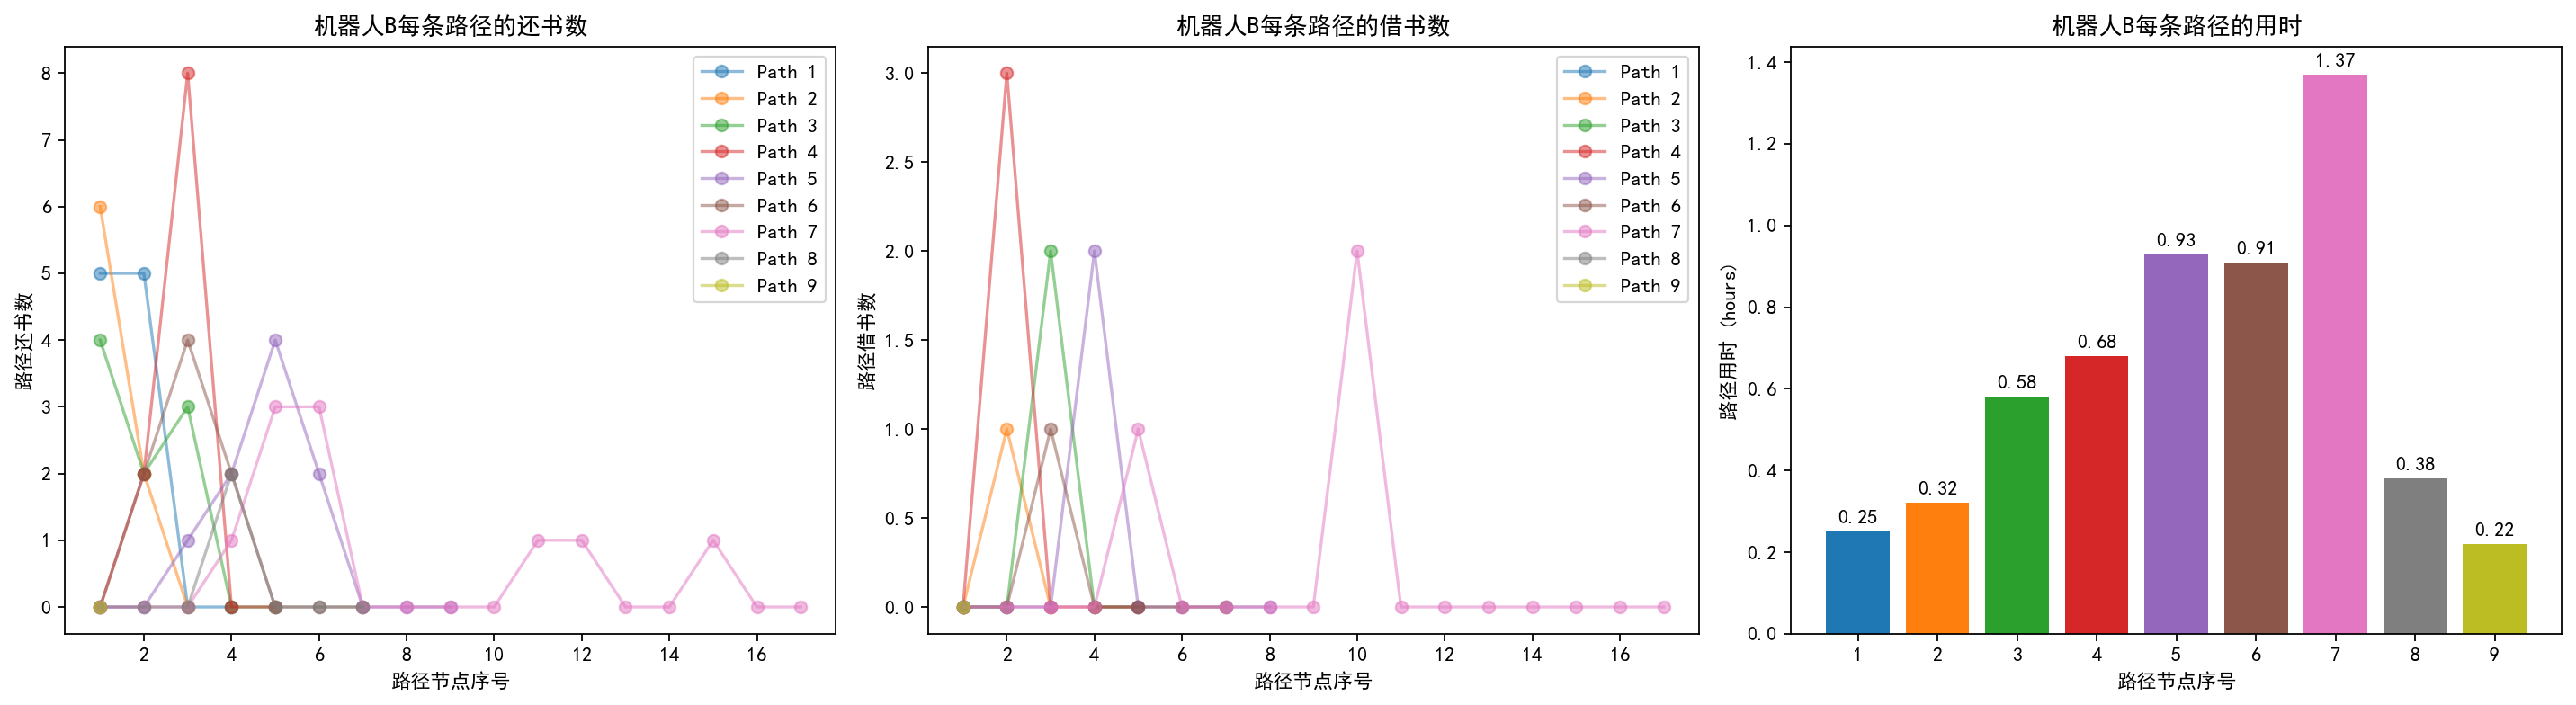

In [113]:
path_return_num = [
    [5,5,0,0],
    [6,2,0],
    [4,2,3,0,0],
    [0,2,8,0,0],
    [0,0,1,2,4,2,0,0,0],
    [0,2,4,2,0,0,0],
    [0,0,0,1,3,3,0,0,0,0,1,1,0,0,1,0,0],
    [0,0,0,2,0,0,0],
    [0]
]
path_borrow_num = [
    [0],
    [0,1,0],
    [0, 0, 2, 0, 0],
    [0, 3, 0, 0, 0],
    [0, 0, 0,2,0,0, 0, 0],
    [0, 0,1,0,0,0,0],
    [0, 0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0],
    [0],
    [0]
]
path_time = [0.2500, 0.3200, 0.5800, 0.6800, 0.9300,0.9100,1.3700,0.3800,0.2200]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
# 绘制路径还书数折线图
plt.figure(figsize=(18, 5),dpi=160)
plt.subplot(1, 3, 1)
for i in range(len(path_return_num)):
    print(path_return_num[i])
    x = [i+1 for i in range(len(path_return_num[i]))]
    y = path_return_num[i]
    plt.plot(x, y, label='Path '+str(i+1),marker="o",alpha=0.5,c=colors[i])
plt.legend()
plt.title('机器人B每条路径的还书数')
plt.xlabel('路径节点序号')
plt.ylabel('路径还书数')
plt.subplot(1, 3, 2)
for i in range(len(path_borrow_num)):
    print(path_borrow_num[i])
    x = [i+1 for i in range(len(path_borrow_num[i]))]
    y = path_borrow_num[i]
    plt.plot(x, y, label='Path '+str(i+1),marker="o",alpha=0.5,c=colors[i])
plt.legend()
plt.title('机器人B每条路径的借书数')
plt.xlabel('路径节点序号')
plt.ylabel('路径借书数')
# 绘制路径用时条形图
plt.subplot(1, 3, 3)
plt.bar(range(len(path_time)), path_time,color=colors)
for i, v in enumerate(path_time):
    plt.text(i, v+0.02, str(v), ha='center')
plt.title('机器人B每条路径的用时')
plt.xlabel('路径节点序号')
plt.ylabel('路径用时 (hours)')
plt.xticks(range(len(path_time)), [i+1 for i in range(len(path_time))])

plt.tight_layout()
plt.show()

# 断点

In [64]:
# 机器人类
class Robot1:
    def __init__(self,G,capacity,current,speed,k):
        self.map_data = G # 机器人的地图信息
        self.capacity = capacity  # 机器人的容量
        self.book = 0  # 机器人当前携带的书籍 {数量}
        self.current_location = current  # 机器人当前所在位置
        self.goal_location = (3,2)  # 机器人目标位置
        self.origin_location = current  # 机器人初始位置
        self.speed = speed  # 机器人行进速度
        self.time = 0 # 机器人运行时间
        self.length_time = 0 # 机器人运行时间
        self.indicator=0 #机器人状态指示，0：初始，1：寻路取书，2：返回图书馆，3：返回起始点
        self.k=k #机器人的抉择系数

    def find_valuable_path_to_load(self):
        # 价值最大化贪心算法尝试到达满载最短路径所需经过的第一个楼栋
        neighbors = list(self.map_data.neighbors(self.current_location))#邻表
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径长度
        Shortest_path_lengths = nx.get_node_attributes(self.map_data, 'shortest_path_length')#最短路
        Returning_books = nx.get_node_attributes(self.map_data, 'value')
        
        # 邻表存在书目
        if np.sum([Returning_books[Note] for Note in neighbors]) != 0:          
            vacancy = self.capacity - self.book
            # 选择相对价值更大的节点
            sorted_buildings = sorted(neighbors, key=lambda x: np.power(min(Returning_books[x], vacancy)
                                      / LEN(self.current_location, x, 0),self.k[0])-self.k[1]*Shortest_path_lengths[x])
            
            building = sorted_buildings[-1]
            taken_books = min(Returning_books[building], vacancy)
            #拿取书目
            self.book += taken_books
            self.map_data.nodes[building]['value'] -= taken_books
            # 记录所需时间
            self.length_time = Path_lengths[order_edge((building, self.current_location))]/self.speed

            return Path_lengths[order_edge((building, self.current_location))], building, taken_books
        
        else:
            #邻表无需求书目时
            nonzero_nodes = [node for node, value in self.map_data.nodes(data='value') if value > 0]            
            # 计算每个节点到当前位置的最短路径长度
            shortest_path_lengths = nx.shortest_path_length(self.map_data, target=self.current_location, weight='weight')
            print(shortest_path_lengths)
            # 选择相对价值更大的节点
            vacancy = self.capacity - self.book
            target_node = max(nonzero_nodes, key=lambda x: np.power(min(Returning_books[x], vacancy)
                                      / shortest_path_lengths[x],self.k[0])-self.k[1]*Shortest_path_lengths[x])
            #去该节点的路径
            shortest_paths=nx.shortest_path(self.map_data,target=target_node,weight='weight')
            node=shortest_paths[self.current_location][1]
            # 记录所需时间
            self.length_time = Path_lengths[order_edge((node, self.current_location))]/self.speed
            print(node)
            
            return Path_lengths[order_edge((node, self.current_location))], target_node, 0

    def return_to_library(self):
        # 机器人返回图书馆
        shortest_paths=nx.shortest_path(self.map_data,target=(3,2),weight='weight')
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径
        shortest_path_length=nx.get_node_attributes(self.map_data, 'shortest_path_length')
        if self.current_location !=(3,2):
            node=shortest_paths[self.current_location][1]
            self.goal_location=node
            Path_lengths[order_edge((node, self.current_location))]/self.speed
            return Path_lengths[order_edge((node, self.current_location))],node
        else:
            self.goal_location=(3,2)
            self.length_time = 0
            return 0,(3,2)
        
    def return_to_origion(self):
        # 机器人返回初始地
        shortest_paths_lengths = nx.shortest_path_length(self.map_data, source=self.current_location, target=self.origin_location, weight='weight')
        shortest_paths = nx.shortest_path(self.map_data, source=self.current_location, target=self.origin_location, weight='weight')
        Path_lengths = nx.get_edge_attributes(self.map_data, 'weight')#路径
        if robot.current_location !=self.origin_location:
            node=shortest_paths[1]
            self.goal_location=node
            Path_lengths[order_edge((node, self.current_location))]/self.speed
            return Path_lengths[order_edge((node, self.current_location))],node
        else:
            return 0,self.origin_location

In [78]:
t=T[-1]
print(f"\nTime: {t}")
A1 = Robot1(None, None, None, None, None)
A1.__dict__ = copy.copy(A.__dict__)
B1 = Robot1(None, None, None, None, None)
B1.__dict__ = copy.copy(B.__dict__)
G1_change=copy.deepcopy(G_change)
Returning1=copy.deepcopy(Returning)

for robot in [A1,B1]:#对两个机器人分别进行考虑
    robot.map_data = G1_change #更新信息
    current_road_time=robot.length_time
    T_diff=round(current_road_time-t+robot.time,4)


    # 机器人回收书籍过程
    if robot.indicator==1:                   
        # 尚在前进
        if T_diff>(0.1*dt) :#在路途中,留一定误差
            continue
        # 恰好到达
        else:
            robot.current_location=robot.goal_location
            robot.time=robot.time+robot.length_time
            print(f"已到达{robot.current_location}")

            # 容量未满
            if (robot.book<robot.capacity) and (Returning1-A.book-B.book)>0:
                    Length,Next,Update_book=robot.find_valuable_path_to_load()
                    robot.goal_location=Next
                    robot.length_time=Length/robot.speed

            # 容量已满
            else:
                robot.indicator=2
                Length,Next=robot.return_to_library()

    # 机器人返回图书馆过程
    elif robot.indicator==2:  

        # 尚在前进
        if T_diff>(0.1*dt):#在路途中,留一定误差
            continue

        # 恰好到达
        else:
            robot.current_location=robot.goal_location
            robot.time=robot.time+robot.length_time
            Length,Next=robot.return_to_library()
            robot.length_time=Length/robot.speed
            robot.goal_location=Next

            # 回到图书馆
            if robot.current_location==(3,2):
                Returning1=Returning1-robot.book
                robot.book=0
                print("已回到图书馆")
                # 继续出发
                if (Returning1-A.book-B.book)>0:
                    robot.indicator=1
                    
                    Length,Next,Update_book=robot.find_valuable_path_to_load()
                    robot.length_time=Length/robot.speed
                    robot.goal_location=Next

                # 返回充电桩
                elif np.sum([value for node,value in G1_change.nodes(data='value')]) == 0:
                    robot.indicator=3
                    Length,Next=robot.return_to_origion()

    elif robot.indicator==0:
        robot.indicator=1
        Length,Next,Update_book=robot.find_valuable_path_to_load()
        robot.goal_location=Next

    # 机器人返回充电桩过程    
    elif robot.indicator==3:
        # 尚在前进
        if T_diff>(0.1*dt) :#在路途中,留一定误差
            continue

        # 恰好到达
        else:
            robot.current_location=robot.goal_location
            robot.time=robot.time+robot.length_time
            Length,Next=robot.return_to_origion()

            # 回到图充电桩
            if robot.current_location==robot.origin_location:
                robot.indicator=10
                if A1.indicator*B1.indicator==100:
                    Returning=-1
                    
    elif robot.indicator==10:
        continue

    G1_change = robot.map_data

    ##全部信息
#     print("Robot A:")
#     attributes = vars(A)
#     for attribute, value in attributes.items():
#         print(f"{attribute}: {value}")

#     print("Robot B:")
#     attributes = vars(B)
#     for attribute, value in attributes.items():
#         print(f"{attribute}: {value}")

#     All_data = np.append(All_data, [t,A.current_location,A.goal_location,B.current_location,B.goal_location])


print("时间差，距离差，理论距离差，图书，指标，时间")
print("A",round((A.length_time-t+A.time),4),
      round(A.speed*(A.length_time-t+A.time),4),
      A.length_time*A.speed,A.book,A.indicator,A.time)
print("B",round(B.length_time-t+B.time,4)
      ,round(B.speed*(B.length_time-t+B.time),4)
      ,B.length_time*B.speed,B.book,B.indicator,B.time)
print(t,A.current_location,A.goal_location,B.current_location,B.goal_location,Returning,"\n") 

print("时间差，距离差，理论距离差，图书，指标，时间")
print("A",round((A1.length_time-t+A1.time),4),
      round(A1.speed*(A1.length_time-t+A1.time),4),
      A1.length_time*A1.speed,A1.book,A1.indicator,A1.time)
print("B",round(B1.length_time-t+B1.time,4)
      ,round(B1.speed*(B1.length_time-t+B1.time),4)
      ,B1.length_time*B1.speed,B1.book,B1.indicator,B1.time)
print(t,A1.current_location,A1.goal_location,B1.current_location,B1.goal_location,Returning,"\n") 





Time: 26.6025
时间差，距离差，理论距离差，图书，指标，时间
A -20.3625 -203.625 0 0 3 6.240000000000001
B -20.0025 -160.02 0 0 3 6.599999999999996
26.6025 (0, 0) (0, 0) (5, 5) (5, 5) -1 

时间差，距离差，理论距离差，图书，指标，时间
A -20.3625 -203.625 0 0 10 6.240000000000001
B -20.0025 -160.02 0 0 10 6.599999999999996
26.6025 (0, 0) (0, 0) (5, 5) (5, 5) -1 



# gif

In [1]:
# 设置图形大小
plt.figure(figsize=(6, 6))

grid_data = [
    [0, 6, 4, 7, 5, 3],
    [3, 5, 3, 4, 3, 4],
    [4, 2, 0, 2, 8, 2],
    [2, 4, -1, 0, 3, 1],
    [5, 3, 6, 5, 6, 5],
    [6, 6, 2, 6, 2, 0]
]
#以固定位置绘制格点
pos = {}
for i in range(len(grid_data)):
    for j in range(len(grid_data[i])):
        pos[(i, j)] = (j, len(grid_data)-i-1)

#绘制无向图
nx.draw(G, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

#绘制节点值
node_labels = nx.get_node_attributes(G, 'value')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

#绘制边权值
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

# 创建一个节点大小字典
node_sizes = [node[1]['value']*100 for node in G.nodes(data=True)]

# 以固定位置绘制圆形
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='b', alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[(0,0),(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)

#显示图形
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))

#以固定位置绘制格点
pos = {}
for i in range(len(grid_data)):
    for j in range(len(grid_data[i])):
        pos[(i, j)] = (j, len(grid_data)-i-1)

#绘制无向图
nx.draw(G_change, pos, with_labels=False, node_size=400, node_color='w', font_size=12, font_weight='bold')

#绘制节点值
node_labels = nx.get_node_attributes(G_change, 'value')
nx.draw_networkx_labels(G_change, pos, labels=node_labels, font_size=12, font_weight='bold', font_color='black')

#绘制边权值
edge_labels = nx.get_edge_attributes(G_change, 'weight')
nx.draw_networkx_edge_labels(G_change, pos, edge_labels=edge_labels, font_size=10, font_color='r', font_weight='bold')

# 创建一个节点大小字典
node_sizes = [node[1]['value']*100 for node in G_change.nodes(data=True)]

# 以固定位置绘制圆形
nx.draw_networkx_nodes(G_change, pos, node_size=node_sizes, node_color='b', alpha=0.2)
nx.draw_networkx_nodes(G_change, pos, nodelist=[(3,2)], node_shape='s', node_size=400, node_color='r', alpha=0.5)

if A.goal_location!=A.current_location:
    edge_labels_A = {order_edge((A.goal_location, A.current_location)): 
                     f'{round(A.speed*(T[-2]-A.time),3)}/{edge_labels[order_edge((A.goal_location, A.current_location))]}'}
    nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_A, font_size=9, font_color='g')
    nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='y', alpha=0.5)
    
else:
    nx.draw_networkx_nodes(G_change, pos, nodelist=[(0,0)], node_shape='d', node_size=400, node_color='g', alpha=0.5)
    
    
    
if B_goal_location!=B_current_location:

    edge_labels_B = {order_edge((B_goal_location, B_current_location)): 
                     f'{round((T[-2]-B.time)*B.speed,3)}/{edge_labels[order_edge((B_goal_location, B_current_location))]}'}
    nx.draw_networkx_edge_labels(G_change, pos,edge_labels=edge_labels_B, font_size=9, font_color='b')
    nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='y', alpha=0.5)
else:
    nx.draw_networkx_nodes(G_change, pos, nodelist=[(5,5)], node_shape='d', node_size=400, node_color='b', alpha=0.5)

#显示图形
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

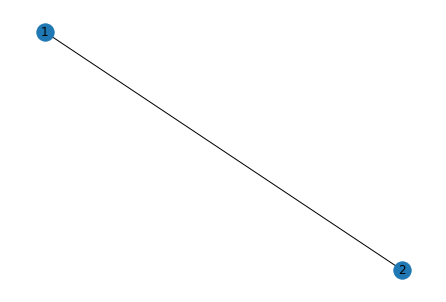

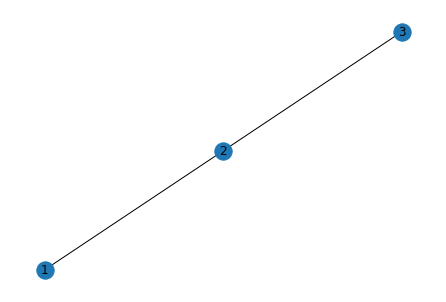

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import imageio

# 创建一个NetworkX图
G = nx.Graph()

# 添加一些节点和边
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

# 绘制图G并储存为gif
images = []
nx.draw(G, with_labels=True)
plt.savefig('graph0.png')
images.append(imageio.imread('graph0.png'))

# 修改图
G.add_node(3)
G.add_edge(2, 3)

# 绘制修改后的图G并储存为gif
nx.draw(G, with_labels=True)
plt.savefig('graph1.png')
images.append(imageio.imread('graph1.png'))

# 将图像序列储存为gif文件
imageio.mimsave('graph.gif', images, duration=1)

# 显示gif文件
from IPython.display import Image
Image(filename="graph.gif")

# 时间和参数

In [14]:
def parameter(a1,a2,a3,b1,b2,b3,initial):
    global G
    A=Robot_plus(G,10,(0,0),8,initial,[a1,a2,a3])
    B=Robot_plus(G,10,(5,5),10,initial,[b1,b2,b3])
    G_change = copy.deepcopy(G)
    T=[0]
    images = []
#     print("开始运行")
    All_data=np.array([[0,(0,0),(0,0),(5,5),(5,5)]],dtype=object)
    # 整体书目（现存加）归零则终止
    Returning=np.sum([value for node,value in G_change.nodes(data='return')])+1
    Borrowing=np.sum([value for node,value in G_change.nodes(data='borrow')])+1
    dt=0.0025

    while (Returning+Borrowing) >=0:
    # while T[-1]<7.4:
        t=T[-1]
    #     print(f"\nTime: {t}")

        for robot in [A,B]:#对两个机器人分别进行考虑
            robot.map_data = G_change #更新信息
            current_road_time=robot.length_time
            T_diff=round(current_road_time-t+robot.time,4)


            # 机器人回收书籍过程
            if robot.indicator==1:                   
                # 尚在前进
                if T_diff>(0.1*dt) :#在路途中,留一定误差
                    continue
                # 恰好到达
                else:
                    robot.current_location=robot.goal_location
                    robot.time=robot.time+robot.length_time

    #                 print(f"已到达{robot.current_location}")

                    # 容量未满(允许携带未送出的书目返回)
                    if ((robot.book_return<(robot.capacity-robot.book_borrow)) and (Returning-A.book_return-B.book_return)>0):
                        Length,Next,Update_book=robot.find_valuable_path_to_load()
                        robot.goal_location=Next
                        robot.length_time=Length/robot.speed
                        Borrowing-=Update_book[1]
                        Update_book[1]=0

                    elif (Borrowing>0 and robot.book_borrow>0) and ((robot.book_return<(robot.capacity-robot.book_borrow)) or (Returning-A.book_return-B.book_return)==0):
                        Length,Next,Update_book=robot.find_valuable_path_to_load()
                        robot.goal_location=Next
                        robot.length_time=Length/robot.speed
                        Borrowing-=Update_book[1]
                        Update_book[1]=0

                    # 任务未完(不允许携带未送出的书目返回)
    #                 if ((robot.book_return<robot.capacity-robot.book_borrow) and (Returning-A.book_return-B.book_return)>0) or((robot.book_borrow>0):
    #                     Length,Next,Update_book=robot.find_valuable_path_to_load()
    #                     robot.goal_location=Next
    #                     robot.length_time=Length/robot.speed
    #                     Borrowing-=Update_book[1]
    #                     Update_book[1]=0

                    # 容量已满
                    else:
                        robot.indicator=2
                        Length,Next=robot.return_to_library()

            # 机器人返回图书馆过程
            elif robot.indicator==2:  

                # 尚在前进
                if T_diff>(0.1*dt):#在路途中,留一定误差
                    continue

                # 恰好到达
                else:
                    robot.current_location=robot.goal_location
                    robot.time=robot.time+robot.length_time
                    Length,Next=robot.return_to_library()
                    robot.length_time=Length/robot.speed
                    robot.goal_location=Next


                    # 回到图书馆
                    if robot.current_location==(3,2):
                        Returning=Returning-robot.book_return
                        robot.book_return=0
    #                     print("已回到图书馆")

                        # 继续出发
                        if (Returning-A.book_return-B.book_return)>0 or Borrowing>0:
                            robot.indicator=1
                            if Borrowing>0:
                                robot.book_borrow=robot.initial_borrow
                            else:
                                robot.book_borrow=0
                            Length,Next,Update_book=robot.find_valuable_path_to_load()
                            robot.length_time=Length/robot.speed
                            robot.goal_location=Next

                        # 返回充电桩
                        elif ((Returning-A.book_return-B.book_return) <= 0) and (Borrowing==0):
                            robot.indicator=3
                            Length,Next=robot.return_to_origion()
                            robot.goal_location=Next
                            robot.length_time=Length/robot.speed

            elif robot.indicator==0:
                robot.indicator=1
                Length,Next,Update_book=robot.find_valuable_path_to_load()
                robot.goal_location=Next

            # 机器人返回充电桩过程    
            elif robot.indicator==3:
                # 尚在前进
                if T_diff>(0.1*dt) :#在路途中,留一定误差
                    continue

                # 恰好到达
                else:
                    robot.current_location=robot.goal_location
                    robot.time=robot.time+robot.length_time
                    Length,Next=robot.return_to_origion()

                    # 回到图充电桩
                    if robot.current_location==robot.origin_location:
                        robot.indicator=10
#                         print("该车已经返回充电桩")
                        if A.indicator*B.indicator==100:
                            Returning=-1

            G_change = robot.map_data


        new_row = np.array([t, A.current_location, A.goal_location, B.current_location, B.goal_location])
        All_data = np.vstack([All_data, new_row])
        T.append(round(t+dt,4))
        
    if t>=10:
        return [a1,a2,a3,b1,b2,b3,initial,10]
#     print(f"Total time: {T[-2]}")
    return [a1,a2,a3,b1,b2,b3,initial,T[-2]]

print(parameter(30,45,-25.    ,1.,0.1,1,   3))
print(parameter(5, 4,-1,    1,4,  -5,   3))
print(parameter(5, 4,-1,    0.2,4,  -5,   3))
print(parameter(3, 1,1,    7,-4,  -5,   3))
print(parameter(3, 1,10,    17,-4,  -5,   3))


C:\Users\husky\AppData\Local\Temp\ipykernel_12140\3075392200.py:133: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_row = np.array([t, A.current_location, A.goal_location, B.current_location, B.goal_location])


[30, 45, -25.0, 1.0, 0.1, 1, 3, 6.5]
[5, 4, -1, 1, 4, -5, 3, 5.9625]
[5, 4, -1, 0.2, 4, -5, 3, 5.9625]
[3, 1, 1, 7, -4, -5, 3, 6.85]
[3, 1, 10, 17, -4, -5, 3, 6.8875]


In [6]:
import time
import tqdm
import multiprocessing as mp

a_vals = np.arange(0.10, 0.11, 0.1)
b_vals = np.arange(0.8, 5, 0.1)
c_vals = np.arange(-0.05, -0.04, 0.02)
d_vals = np.arange(5, 5.60, 1)
e_vals = np.arange(1.5, 5, 0.1)
f_vals = np.arange(-10, -9.04, 2)
j_vals = np.array([2,3,4,5,6])

A,B,C,D,E,F,J= np.meshgrid(a_vals,b_vals,c_vals,d_vals,e_vals,f_vals,j_vals,indexing='ij')
params = np.column_stack((A.ravel(), B.ravel(), C.ravel(), D.ravel(),E.ravel(),F.ravel(),J.ravel()))

# TIME = np.array([[0.8,0,1.3,0.1,5.54]])a_valsa_vals
TIME = np.array([[41, -7.0, 3, 0.042, 0.5, 2, 2, 6.61]])
for p in tqdm.tqdm(params):
#     print(p)
    T0 = parameter(*p)
#     print(p,T0)
    TIME = np.vstack([TIME, T0])

min_index = np.argmin(TIME[:, -1])
min_row = TIME[min_index, :]
print("最小")
print(min_row)


  0%|                                                                                         | 0/7350 [00:00<?, ?it/s]C:\Users\husky\AppData\Local\Temp\ipykernel_10316\326511363.py:133: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_row = np.array([t, A.current_location, A.goal_location, B.current_location, B.goal_location])
  1%|▊                                                                               | 78/7350 [00:08<13:48,  8.78it/s]


KeyboardInterrupt: 

In [64]:
print(TIME.shape)
print(TIME)
min_index = np.argmin(TIME[:, -1])
min_row = TIME[min_index, :]
print("最小")
print(min_row)

(7351, 8)
[[ 41.    -7.     3.   ...   2.     2.     6.61]
 [  0.1    0.8   -0.05 ... -10.     2.     7.34]
 [  0.1    0.8   -0.05 ... -10.     3.     6.35]
 ...
 [  0.1    4.9   -0.05 ... -10.     4.     6.46]
 [  0.1    4.9   -0.05 ... -10.     5.     7.39]
 [  0.1    4.9   -0.05 ... -10.     6.     9.2 ]]
最小
[  0.1    0.8   -0.05   5.     1.5  -10.     3.     6.35]


(2161, 5)


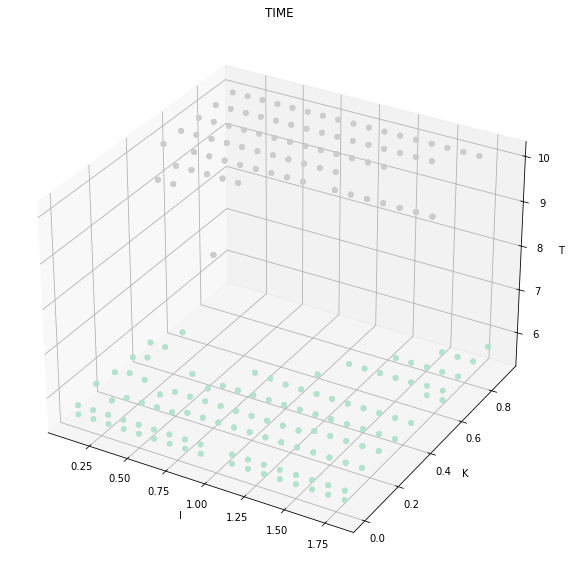

In [130]:
# print(TIME)
print(TIME.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
TIME1=TIME[1:,:]
# 将TIME转换成4个矩阵
I, K, J, F = np.meshgrid(i_vals, k_vals, j_vals, f_vals, indexing='ij')
TIME_I = TIME1[:, 0].reshape(I.shape)
TIME_K = TIME1[:, 1].reshape(K.shape)
TIME_J = TIME1[:, 2].reshape(J.shape)
TIME_F = TIME1[:, 3].reshape(F.shape)
TIME_T = TIME1[:, 4].reshape(F.shape)

# 绘制曲面图
surf = ax.scatter(I, K, TIME_T, cmap='Pastel2',c=TIME_T)

# 设置坐标轴标签
ax.set_xlabel('I')
ax.set_ylabel('K')
ax.set_zlabel('T')
ax.set_title('TIME')

plt.show()

[0.8  0.   1.3  0.1  5.54]
首先将循环体中的计算过程封装成了一个函数 compute_T0()，并将其作为进程的目标函数。然后，对于每个计算参数 p，我们使用 multiprocessing.Event() 函数创建一个事件对象 event，并使用 multiprocessing.Process() 函数创建一个进程 proc，将 compute_T0() 函数和 p、event 作为参数传递给进程。接着，我们使用 proc.join(max_time) 方法阻塞主进程，等待一定时间后检查进程是否已经结束，如果进程仍在运行，则使用 proc.terminate() 方法终止进程，并使用 continue 语句跳过当前计算。如果进程已经结束，则使用 proc.join() 方法获取进程的返回值 T0。最后，如果 T0 不为 None，则将其添加到结果数组 TIME 中。这样，就可以实现在 T0 = parameter(*p) 运行时间过长时，终止进程并跳过当前计算，从而保证程序的正常运行。

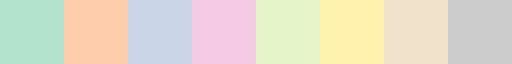

In [120]:
color_map=np.random.choice(sorted(plt.colormaps()))
plt.get_cmap(color_map)

In [21]:
import networkx as nx
import copy

class Robot:
    def __init__(self, G, speed, start, capacity, k):
        self.G = G
        self.speed = speed
        self.current_location = start
        self.goal_location = None
        self.book = 0
        self.capacity = capacity
        self.k = k
        self.indicator = 0
        self.time = 0
        
    def find_valuable_path_to_load(self):
        # Calculate the length of the path to each neighboring building and choose the building with the highest relative value
        neighbors = list(self.G.neighbors(self.current_location))
        max_value = -float('inf')
        next_node = None
        update_book = None
        for neighbor in neighbors:
            value = 0
            for i in range(len(self.k)):
                coef = self.k[i]
                length = nx.shortest_path_length(self.G, neighbor, self.goal_location, weight='length')
                value += coef * length**(i+1)
            value = self.G.nodes[neighbor]['value'] - value
            if value > max_value and self.book + self.G.nodes[neighbor]['value'] <= self.capacity:
                max_value = value
                next_node = neighbor
                update_book = self.G.nodes[neighbor]['value']
        length = nx.shortest_path_length(self.G, self.current_location, next_node, weight='length')
        return length, next_node, update_book
    
# Create the graph
G = nx.Graph()
G.add_nodes_from([(0,0), (2,0), (4,0), (5,2), (4,4), (2,4), (0,4), (1,2), (3,2)])
G.add_edges_from([((0,0), (2,0)), ((2,0), (4,0)), ((4,0), (5,2)), ((5,2), (4,4)), ((4,4), (2,4)), ((2,4), (0,4)), ((0,4), (1,2)), ((1,2), (0,0)), ((2,0), (1,2)), ((4,0), (3,2)), ((5,2), (3,2)), ((4,4), (3,2)), ((2,4), (3,2))])
nx.set_node_attributes(G, {node: 0 for node in G.nodes()}, 'value')
G.nodes[(1,2)]['value'] = 10
G.nodes[(3,2)]['value'] = 12

# Initialize the robots
A = Robot(G, 8, (0,0), 10, [-0.9,0.1])
B = Robot(G, 10, (5,5), 10, [2,1])

# Create a copy of the graph for bookkeeping purposes
G_copy = copy.deepcopy(G)

# Initialize the list of times
T = [0]

# Simulate the delivery of books
dt = 0.0025
while True:
    t = T[-1]
    print(f"Time: {t}")
    
    # Check if each robot has reached its goal location
    for robot in [A, B]:
        if robot.goal_location is not None:
            if robot.current_location == robot.goal_location:
                if robot.indicator == 1:
                    # The robot has returned books to the library
                    robot.book -= robot.G.nodes[robot.goal_location]['value']
                    robot.G.nodes[robot.goal_location]['value'] = 0
                    robot.indicator = 0
                    robot.goal_location = None
                elif robot.indicator == 2:
                    # The robot has returned to its starting point
                    robot.indicator = 0
                    robot.goal_location = None
    
    # Check if all books have been returned to the library
    Returning = sum([robot.book for robot in [A, B]]) + sum([value for node, value in G_copy.nodes(data='value')])
    if Returning == 0:
        break
    
    # For each robot, either return books to the library, return to its starting point, or find the next building to collect books from
    for robot in [A, B]:
        if robot.indicator == 0:
            # The robot needs to find the next building to collect books from
            robot.indicator = 1
            robot.goal_location = robot.find_valuable_path_to_load()[1]
        elif robot.indicator == 1:
            # The robot is returning books to the library
            length, next_node, update_book = robot.find_valuable_path_to_load()
            if length <= 0:
                # The robot has reached its goal location
                robot.book += update_book
                robot.indicator = 0
                robot.goal_location = None
            else:
                # The robot is still on its way to the goal location
                robot.current_location = next_node
        elif robot.indicator == 2:
            # The robot is returning to its starting point
            length = nx.shortest_path_length(robot.G, robot.current_location, (5,5), weight='length')
            if length <= 0:
                # The robot has reached its starting point
                robot.indicator = 0
                robot.goal_location = None
            else:
                # The robot is still on its way to its starting point
                robot.current_location = nx.shortest_path(robot.G, robot.current_location, (5,5), weight='length')[1]
    
    # Update the time
    T.append(t+dt)

# Print the final results
print(f"Total time: {T[-1]}")
print(f"Robot A route: {[(robot.current_location, robot.goal_location) for robot in [A] if robot.goal_location is not None]}")
print(f"Robot A total time: {sum([length/robot.speed for robot in [A] for length in nx.all_shortest_paths(G, robot.current_location, (0,0), weight='length')])}")
print(f"Robot B route: {[(robot.current_location, robot.goal_location) for robot in [B] if robot.goal_location is not None]}")
print(f"Robot B total time: {sum([length/robot.speed for robot in [B] for length in nx.all_shortest_paths(G, robot.current_location, (5,5), weight='length')])}")

Time: 0
{(2, 0): 0, (0, 0): 1, (4, 0): 1, (1, 2): 1, (5, 2): 2, (3, 2): 2, (0, 4): 2, (4, 4): 3, (2, 4): 3}


TypeError: unsupported operand type(s) for ** or pow(): 'dict' and 'int'